<div class="alert alert-success">
<h1> Комментарий ревьюера</h1>

Привет, Андрей!
    
Меня зовут Николай Акопджанов, и я буду проверять твой проект) Предлагаю нам сразу перейти на ты, если ты не против)
    
Стоит сразу заметить, что основная моя задача помочь тебе в освоении пройденного материала, а не в оценке проекта. 
    
Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> и есть такой 👍 знак  - всё сделано правильно; <font color=orange>оранжевый</font> и есть такой 💡 знак - есть что улучшить, но не критично; <font color=red>красный</font> и есть такой ❌ знак- нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
    
Ты можешь отвечать мне своими комментариями и выделять их другим <font color=blue>цветом</font>.

</div>

<div class="alert alert-success">
<h1> Комментарий ревьюера</h1>

Еще раз привет!
    
Спасибо за доработку проекта.
Новые комментарии будут отмечены V2
</div>

## Цели работы:
По заданию на проект, необходимо выполнить анализ продаж и оценок пользователей компьютерных игр, которые продаёт по всему миру интернет-магазин. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

### Описание данных:

1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Шаг 1. Загрузка и обзор данных

Загрузим необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats as st

Загрузим предоставляенные данные.

In [2]:
#pth1 = '\\Users\Home\Documents\Yandex\games.csv' # Локальный путь
pth1 = '\\Users\\Home\\Documents\\Yandex\\1 модуль\проект №5 СБОРНЫЙ\games.csv' # Локальный путь
pth2 = '/datasets/games.csv' # Серверный путь

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep=',')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep=',')
else:
    print('Something is wrong')  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


In [4]:
def check_dup_nan(dataframe):
    df = dataframe
    list_col = list(df.columns)
    print('Количество задублированных строк в дата сете:', df.duplicated().sum(), 'шт.')
    print('')
    summa = 0
    for col in list_col:
        print('Кол-во пропусков в столбеце:  ', col, '-', df[col].isna().sum(), 'шт.')
        summa += df[col].isna().sum()
    print('===================================================================')
    check_marker = df.duplicated().sum() + summa
    if check_marker == 0:
        print('Пропусков и дубликатов строк не обнаружено.')
    else:
        print('Ошибки в данных! Требуется обратить внимание.')

In [5]:
check_dup_nan(data)

Количество задублированных строк в дата сете: 0 шт.

Кол-во пропусков в столбеце:   Unnamed: 0 - 0 шт.
Кол-во пропусков в столбеце:   Name - 2 шт.
Кол-во пропусков в столбеце:   Platform - 0 шт.
Кол-во пропусков в столбеце:   Year_of_Release - 269 шт.
Кол-во пропусков в столбеце:   Genre - 2 шт.
Кол-во пропусков в столбеце:   NA_sales - 0 шт.
Кол-во пропусков в столбеце:   EU_sales - 0 шт.
Кол-во пропусков в столбеце:   JP_sales - 0 шт.
Кол-во пропусков в столбеце:   Other_sales - 0 шт.
Кол-во пропусков в столбеце:   Critic_Score - 8578 шт.
Кол-во пропусков в столбеце:   User_Score - 6701 шт.
Кол-во пропусков в столбеце:   Rating - 6766 шт.
Ошибки в данных! Требуется обратить внимание.


<div class="alert alert-success">
<h1> Комментарий ревьюера 👍</h1>

Отличный обзор данных!
</div>

# Шаг 2. Подготовка данных к анализу.

## Произведем заммену названий столбцов на "красивые".

In [6]:
data.head(1)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [7]:
columns = data.columns
new_col = [x.lower() for x in columns]
data.set_axis(new_col, axis = 'columns', inplace=True)
data = data.rename(columns = {'unnamed: 0':'unnamed'})

In [8]:
data.head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed          16715 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16715 non-null  object 
 3   year_of_release  16446 non-null  float64
 4   genre            16713 non-null  object 
 5   na_sales         16715 non-null  float64
 6   eu_sales         16715 non-null  float64
 7   jp_sales         16715 non-null  float64
 8   other_sales      16715 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       10014 non-null  object 
 11  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


<div class="alert alert-danger">
<h1> Комментарий ревьюера ❌</h1>
    
Некоторые блоки кода не работают. Посмотри, пожалуйста, что пошло не так. Перед отправкой проекта стоит проверять работоспособность кода — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).
![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)</div>

<div class="alert alert-info">
<h1> Комментарий студента 1</h1>
    
- Николай привет! Я работаю над проектами исключительно на локальной машине, в виду того, что Яндекс имеет проблемы со сроками по проверке работ и не допускает к следующей, пока не примут предыдущую. Так вот в файле, который я скачал как исходные данные для работы присутствует столбец "Unnamed: 0" — это первая строчка в ячейке с инфо по дата сету в приложенном скриншоте. А в файле, который ты загружаешь, когда запускаешь проект из курса этой строчки нет. Отсюда и стопорится дальнейшее решение. 
- Я закомментирую строчки которые лишние для данных с сайта курса.
- Я проверил, теперь все ячейки работают корректно с данными подгружаемыми с сети.
    
(на скриншоте представлены ячейки с моей локальной машины)

    
[![a805897366.png](https://i.postimg.cc/FzK1WwV2/a805897366.png)](https://postimg.cc/R6jMqs8R)</div>

<div class="alert alert-warning">
<h1> Комментарий ревьюера 💡 V2</h1>
    
`Unnamed: 0` возникает, когда данные сохраняют с указанием индекса `pd.DataFrame().to_csv(..., index=column)`. Если при чтении указать этот столбец `pd.read_csv(..., index_col=0)` - данные сразу прочитаются корректно.
</div>

## Столбец unnamed содержит порядковый номера строк, считаю что это лишнее, удалим этот столбец.

In [10]:
#data['unnamed'].unique()

In [11]:
#data = data.drop(['unnamed'], axis=1)

In [12]:
data.head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


## Столбец - name. Проверим на пропуски и при необходимости преобразуем его.

In [13]:
data['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

Столбец содержит две строки с пропуском в данных. Посмотрим на эти строки.

In [14]:
data[data['name'].isna()]

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Отсутствует имя игры, жанр и рейтинги. Невозможно никак идентифицировать игры. Возможно в дальнейщем мы удалим эти строки.

In [15]:
#Заменим пропуски на "unknown"
data['name'] = data['name'].fillna('unknown')

In [16]:
#Код на случай удаления строк
#data = data.dropna(subset=['name'])

#Кол-во пропусков в столбце name.
#val = 'name'
#print('Кол-во пропусков в столбце', val, ':',data[val].isna().sum(), 'шт.')

Данные удалены.

## Столбец - platform. Проверим на пропуски и при необходимости преобразуем его.

In [17]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

### Проверим столбец на неявные дублткаты с помощью "википедии".

Слишком много сокращенных названий, попробуем разобраться что есть что убедимся что нет неявных дубликатов.

Заменим название "2600" на "Atari_2600".

In [18]:
data['platform'] = data['platform'].replace('2600', 'Atari_2600')
data[data['platform'] == 'Atari_2600'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
89,89,Pac-Man,Atari_2600,1982.0,Puzzle,7.28,0.45,0.0,0.08,NaN,NaN,NaN


Заменим название "3DS" на "Nintendo_3DS".

In [19]:
data['platform'] = data['platform'].replace('3DS', 'Nintendo_3DS')
data[data['platform'] == 'Nintendo_3DS'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
33,33,Pokemon X/Pokemon Y,Nintendo_3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN


Заменим газвание "DC" на "Dreamcast".

In [20]:
data['platform'] = data['platform'].replace('DC', 'Dreamcast')
data[data['platform'] == 'Dreamcast'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
643,643,Sonic Adventure,Dreamcast,1998.0,Platform,1.26,0.61,0.46,0.08,NaN,NaN,NaN


Заменим название "DS" на "Nintendo_DS".

In [21]:
data['platform'] = data['platform'].replace('DS', 'Nintendo_DS')
data[data['platform'] == 'Nintendo_DS'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6,6,New Super Mario Bros.,Nintendo_DS,2006.0,Platform,11.28,9.14,6.5,2.88,89.0,8.5,E


Заменим название "GB" на "Game_Boy".

In [22]:
data['platform'] = data['platform'].replace('GB', 'Game_Boy')
data[data['platform'] == 'Game_Boy'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,4,Pokemon Red/Pokemon Blue,Game_Boy,1996.0,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN


Заменим название "GBA" на "Game_Boy_Advance".

In [23]:
data['platform'] = data['platform'].replace('GBA', 'Game_Boy_Advance')
data[data['platform'] == 'Game_Boy_Advance'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
25,25,Pokemon Ruby/Pokemon Sapphire,Game_Boy_Advance,2002.0,Role-Playing,6.06,3.9,5.38,0.5,NaN,NaN,NaN


Заменим название "GC" на "GameCube".

In [24]:
data['platform'] = data['platform'].replace('GC', 'GameCube')
data[data['platform'] == 'GameCube'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
111,111,Super Smash Bros. Melee,GameCube,2001.0,Fighting,4.41,1.04,1.39,0.22,92.0,9.1,T


Заменим название "GEN" на "SEGA".

In [25]:
data['platform'] = data['platform'].replace('GEN', 'SEGA')
data[data['platform'] == 'SEGA'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,145,Sonic the Hedgehog 2,SEGA,1992.0,Platform,4.47,1.2,0.16,0.19,NaN,NaN,NaN


Заменим название "GG" на "SEGA_GG".

In [26]:
data['platform'] = data['platform'].replace('GG', 'SEGA_GG')
data[data['platform'] == 'SEGA_GG'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13571,13571,Sonic the Hedgehog 2 (8-bit),SEGA_GG,1992.0,Platform,0.0,0.0,0.04,0.0,NaN,NaN,NaN


Заменим название "N64" на "Nintendo_64".

In [27]:
data['platform'] = data['platform'].replace('N64', 'Nintendo_64')
data[data['platform'] == 'Nintendo_64'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
45,45,Super Mario 64,Nintendo_64,1996.0,Platform,6.91,2.85,1.91,0.23,NaN,NaN,NaN


Заменим название "PSV" на "PSVita".

In [28]:
data['platform'] = data['platform'].replace('PSV', 'PSVita')
data[data['platform'] == 'PSVita'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
868,868,Minecraft,PSVita,2014.0,Misc,0.18,0.64,0.9,0.24,NaN,NaN,NaN


Заменим название "SAT" на "SEGA_Saturn".

In [29]:
data['platform'] = data['platform'].replace('SAT', 'SEGA_Saturn')
data[data['platform'] == 'SEGA_Saturn'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
893,893,Virtua Fighter 2,SEGA_Saturn,1995.0,Fighting,0.34,0.26,1.3,0.03,NaN,NaN,NaN


Заменим название "SCD" на SEGA_CD

In [30]:
data['platform'] = data['platform'].replace('SCD', 'SEGA_CD')
data[data['platform'] == 'SEGA_CD'].head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1263,1263,Sonic CD,SEGA_CD,1993.0,Platform,1.0,0.36,0.09,0.05,NaN,NaN,NaN


## Столбец - year_of_release. Проверим на пропуски и при необходимости преобразуем его.

Переведем столбец year_of_release в целочисленный тип т.к. в столбце указан год выпуска игры, это будет правильнее. Чтобы это сделать необходимо избавиться от пропусков. Заменим пропуски на "0".

In [31]:
#Кол-во пропусков в столбце year_of_release.
val = 'year_of_release'
print('Кол-во пропусков в столбце', val, ':',data[val].isna().sum(), 'шт.')

Кол-во пропусков в столбце year_of_release : 269 шт.


In [32]:
#Заменим пропуски на "0"
data['year_of_release'] = data['year_of_release'].fillna(0)
#Теперь можно перевести столбец в целочисленный вид данных
data['year_of_release'] = data['year_of_release'].astype('int32')
#Проверим результат
data['year_of_release'].dtypes

dtype('int32')

## Столбец - genre. Проверим на пропуски и при необходимости преобразуем его.

In [33]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Столбец в порядке.

## Столбец - na_sales, eu_sales, jp_sales, other_sales. Проверим на пропуски и при необходимости преобразуем.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed          16715 non-null  int64  
 1   name             16715 non-null  object 
 2   platform         16715 non-null  object 
 3   year_of_release  16715 non-null  int32  
 4   genre            16713 non-null  object 
 5   na_sales         16715 non-null  float64
 6   eu_sales         16715 non-null  float64
 7   jp_sales         16715 non-null  float64
 8   other_sales      16715 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       10014 non-null  object 
 11  rating           9949 non-null   object 
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.5+ MB


Пропусков в этих столбцах нет.

## Столбец - critic_score. Проверим на пропуски и при необходимости преобразуем его.

In [35]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Переведем столбец critic_score в целочисленный тип т.к. в столбце указан рейтинг, это будет правильнее. Чтобы это сделать необходимо избавиться от пропусков. Заменим пропуски на "0".

In [36]:
#Кол-во пропусков в столбце critic_score.
val = 'critic_score'
print('Кол-во пропусков в столбце', val, ':',data[val].isna().sum(), 'шт.')

Кол-во пропусков в столбце critic_score : 8578 шт.


In [37]:
#Заменим пропуски на "0"
data['critic_score'] = data['critic_score'].fillna(0)
#Теперь можно перевести столбец в целочисленный вид данных
data['critic_score'] = data['critic_score'].astype('int32')
#Проверим результат
data['critic_score'].dtypes

dtype('int32')

In [38]:
data.head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E


## Столбец - user_score. Проверим на пропуски и при необходимости преобразуем его.

In [39]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Аббревиатура "tbd" - to be determind означает что рейтинг еще не определен, по этому  эти строки можно приравнять к "nan". Произведем замены "nan" на "tbd". Тем самым у нас будут заполнены все пропуски.

In [40]:
#Заменим пропуски на "tbd"
data['user_score'] = data['user_score'].fillna('tbd')
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd'], dtype=object)

In [41]:
data['user_score'] = data['user_score'][data['user_score'] != 'tbd'].astype('float32')
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan], dtype=float32)

## Столбец - rating. Проверим на пропуски и при необходимости преобразуем его.

In [42]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Заменим пропуски на значение "unknown"

In [43]:
#Заменим пропуски на "unknown"
data['rating'] = data['rating'].fillna('unknown')
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'unknown'],
      dtype=object)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed          16715 non-null  int64  
 1   name             16715 non-null  object 
 2   platform         16715 non-null  object 
 3   year_of_release  16715 non-null  int32  
 4   genre            16713 non-null  object 
 5   na_sales         16715 non-null  float64
 6   eu_sales         16715 non-null  float64
 7   jp_sales         16715 non-null  float64
 8   other_sales      16715 non-null  float64
 9   critic_score     16715 non-null  int32  
 10  user_score       7590 non-null   float32
 11  rating           16715 non-null  object 
dtypes: float32(1), float64(4), int32(2), int64(1), object(4)
memory usage: 1.3+ MB


Все данные обработаны, можно продолжать далее выполнять задачи.

## Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец - "total_sales".

In [45]:
data['total_sales'] = data['name']
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [46]:
data.head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54


<div class="alert alert-success">
<h1> Комментарий ревьюера 👍 V2</h1>

Отлично, данные готовы к анализу)
</div>

# Шаг 3. Исследоватедбский анализ данных.

## Построим графики зависимостей кол-ва выпускаемых игр по годам.

<AxesSubplot:xlabel='index'>

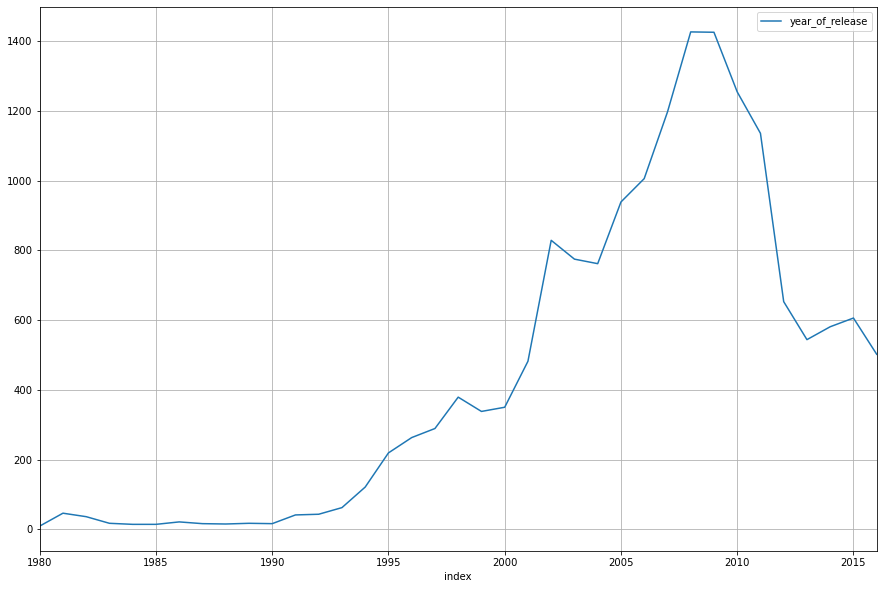

In [47]:
year_list = data['year_of_release'].value_counts().sort_index().reset_index()
#year_list['year_of_release'].plot(x='index', figsize=(15,10))
year_list.pivot_table(index='index', values='year_of_release').plot(figsize=(15,10), xlim=(1980,2016), grid=True)

По графикку можно сказать что рост выпускаемых игр начался в 1993 году. Пик пришелся на 2008 и 2009 года, далее наблюдаем большой спад.

## Посмотрим, как менялись продажи по платформам. Определим платформы с наибольшими суммарными продажами и построим распределение по годам. Попробуем определить за какой характерный срок появляются новые и исчезают старые платформы?

In [48]:
data.head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54


In [49]:
platform_total_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_total_sales

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
Nintendo_DS,806.12
PS,730.86
Game_Boy_Advance,317.85
PS4,314.14
PSP,294.05


In [50]:
#Проверка правильности выполнения кода. - Код работает верно.
data[data['platform'] == 'SEGA']['total_sales'].sum()

30.770000000000003

In [51]:
platform_total_sales.head(7)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
Nintendo_DS,806.12
PS,730.86
Game_Boy_Advance,317.85


In [52]:
platform_total_sales.reset_index().head(2)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42


In [53]:
list_best_platform = platform_total_sales.head(6).reset_index()
list_best_platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,Nintendo_DS,806.12
5,PS,730.86


In [54]:
print('Видно что самые прибыльные консоли это -' , list(list_best_platform['platform']))

Видно что самые прибыльные консоли это - ['PS2', 'X360', 'PS3', 'Wii', 'Nintendo_DS', 'PS']


После "PS2" идет сильный спад по продажам, более чем в два раза. Поэтому буду рассматривать именно этот список консолей, т.к. еще раз - это самые популярные, если смотреть по суммарным продажам.

## Начем анализ популярных платформ с лидера продаж - PS2. Построим изменение продаж по годам.

In [55]:
#Соберем датасет исходя из необходимых данных и сразу исключим пропуски в данных - не включим в набор строки с year_of_release = 0
console = 'PS2'
df_ps2 = data[(data['platform'] == console) & (data['year_of_release'] != 0)][['platform', 'year_of_release', 'total_sales']]
df_ps2.head()

,platform,year_of_release,total_sales
17,PS2,2004,20.81
24,PS2,2002,16.15
28,PS2,2001,14.97
38,PS2,2001,13.10
48,PS2,2004,11.65


Сгруппируем данные по годам и посчитаем суммарные продажи по годам с помощью сводной  таблицы.

In [56]:
df_ps2 = df_ps2.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_ps2

,total_sales
year_of_release,
2000,39.17
2001,166.43
2002,205.38
2003,184.31
2004,211.81
2005,160.66
2006,103.42
2007,75.99
2008,53.90


<AxesSubplot:title={'center':'PS2'}, xlabel='year_of_release'>

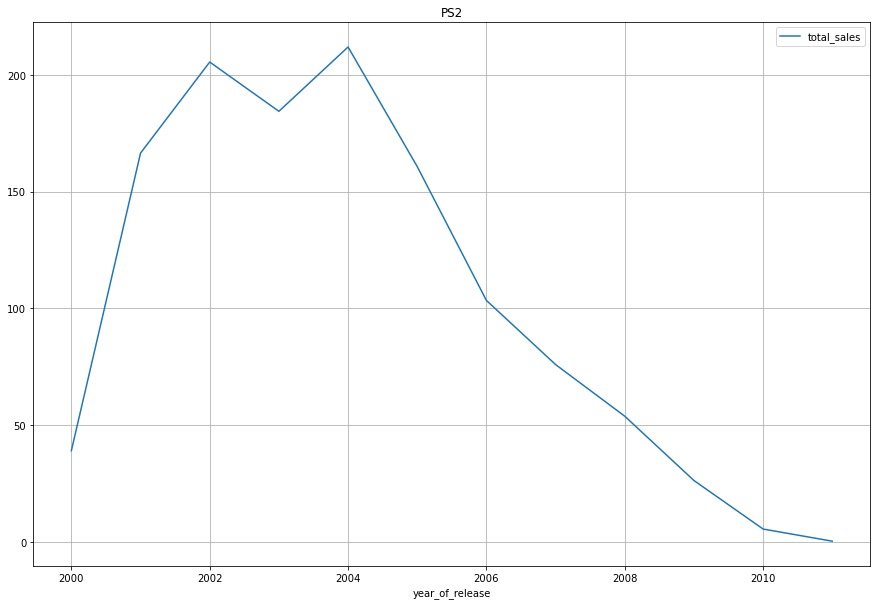

In [57]:
df_ps2['total_sales'].plot(figsize=(15,10), grid=True, legend=True, title=console)

Пик продаж PS2 приходится на 2001 - 2005 года, продажи были выше отметки в 150 млн.$ в год.

## Консоль - X360. Построим изменение продаж по годам.

In [58]:
#Соберем датасет исходя из необходимых данных и сразу исключим пропуски в данных - не включим в набор строки с year_of_release = 0
console = 'X360'
df_x360 = data[(data['platform'] == console) & (data['year_of_release'] != 0)][['platform', 'year_of_release', 'total_sales']]
df_x360.head()

,platform,year_of_release,total_sales
14,X360,2010,21.82
23,X360,2013,16.27
29,X360,2011,14.73
32,X360,2010,14.62
35,X360,2012,13.68


Сгруппируем данные по годам и посчитаем суммарные продажи по годам с помощью сводной  таблицы.

In [59]:
df_x360 = df_x360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_x360

,total_sales
year_of_release,
2005,8.25
2006,51.62
2007,95.41
2008,135.26
2009,120.29
2010,170.03
2011,143.84
2012,99.74
2013,88.58


<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

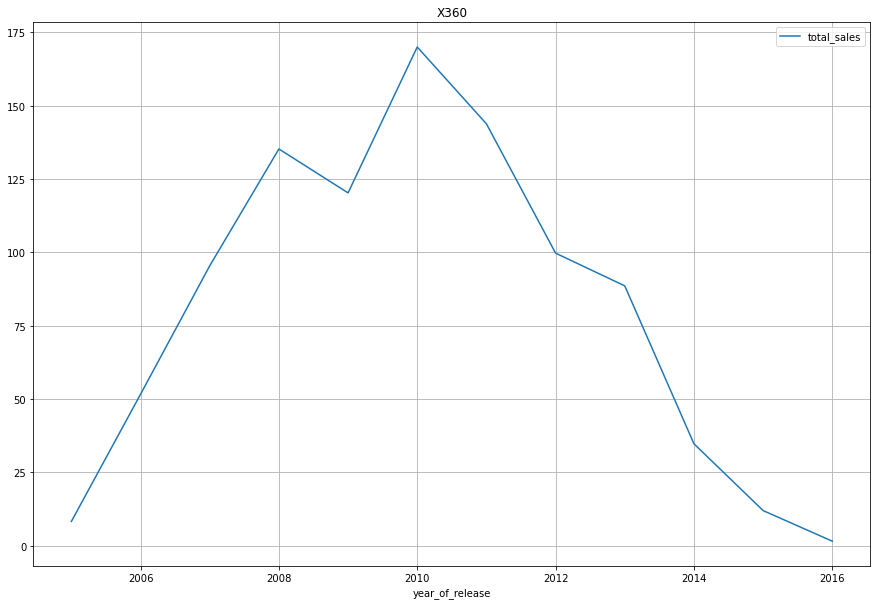

In [60]:
df_x360['total_sales'].plot(figsize=(15,10), grid=True, legend=True, title=console)

Пик продаж X360 приходится на 2007 - 2013 года, продажи были в районе отметки в 100 млн.$ в год.

## Консоль - PS3. Построим изменение продаж по годам.

In [61]:
#Соберем датасет исходя из необходимых данных и сразу исключим пропуски в данных - не включим в набор строки с year_of_release = 0
console = 'PS3'
df_ps3 = data[(data['platform'] == console) & (data['year_of_release'] != 0)][['platform', 'year_of_release', 'total_sales']]
df_ps3.head()

,platform,year_of_release,total_sales
16,PS3,2013,21.05
34,PS3,2012,13.79
37,PS3,2011,13.33
41,PS3,2010,12.63
54,PS3,2010,10.70


Сгруппируем данные по годам и посчитаем суммарные продажи по годам с помощью сводной  таблицы.

In [62]:
df_ps3 = df_ps3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_ps3

,total_sales
year_of_release,
2006,20.96
2007,73.19
2008,118.52
2009,130.93
2010,142.17
2011,156.78
2012,107.36
2013,113.25
2014,47.76


<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

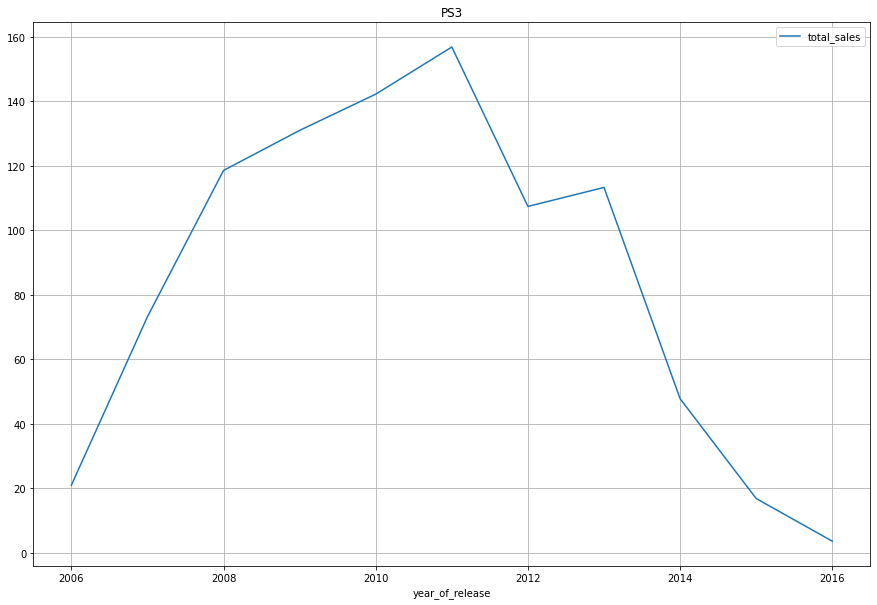

In [63]:
df_ps3['total_sales'].plot(figsize=(15,10), grid=True, legend=True, title=console)

Пик продаж PS3 приходится на 2007 - 2013 года, продажи были выше отметки в 70 млн.$ в год.

## Консоль - Wii. Построим изменение продаж по годам.

In [64]:
#Соберем датасет исходя из необходимых данных и сразу исключим пропуски в данных - не включим в набор строки с year_of_release = 0
console = 'Wii'
df_wii = data[(data['platform'] == console) & (data['year_of_release'] != 0)][['platform', 'year_of_release', 'total_sales']]
df_wii.head()

,platform,year_of_release,total_sales
0,Wii,2006,82.54
2,Wii,2008,35.52
3,Wii,2009,32.77
7,Wii,2006,28.91
8,Wii,2009,28.32


Сгруппируем данные по годам и посчитаем суммарные продажи по годам с помощью сводной  таблицы.

In [65]:
df_wii = df_wii.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_wii

,total_sales
year_of_release,
2006,137.15
2007,152.77
2008,171.32
2009,206.97
2010,127.95
2011,59.65
2012,21.71
2013,8.59
2014,3.75


<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

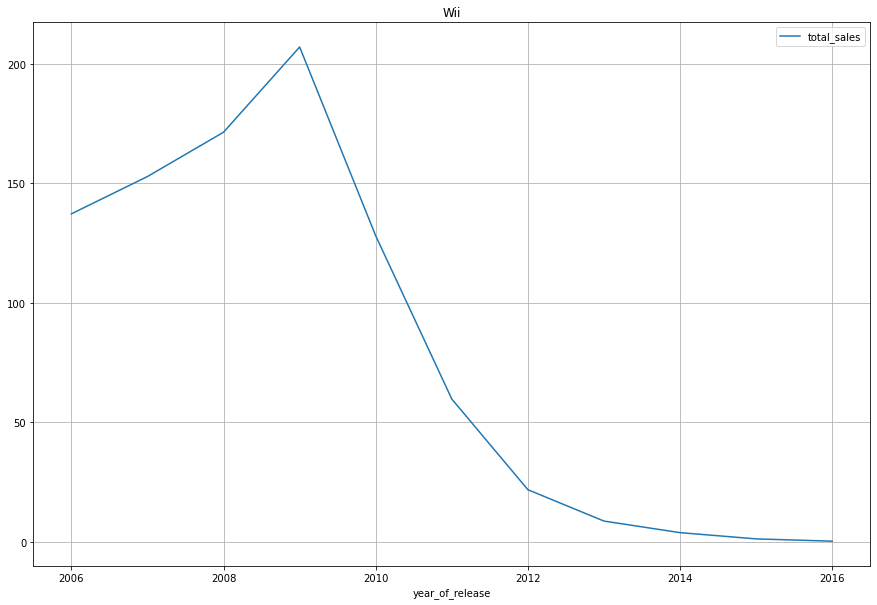

In [66]:
df_wii['total_sales'].plot(figsize=(15,10), grid=True, legend=True, title=console)

Wii хорошо стартовал с 2006 по 2010 на протыжении 5 лет продажи держались выше 120 млн.$ за год.

## Консоль - Nintendo_DS. Построим изменение продаж по годам.

In [67]:
#Соберем датасет исходя из необходимых данных и сразу исключим пропуски в данных - не включим в набор строки с year_of_release = 0
console = 'Nintendo_DS'
df_nds = data[(data['platform'] == console) & (data['year_of_release'] != 0)][['platform', 'year_of_release', 'total_sales']]
df_nds.head()

,platform,year_of_release,total_sales
6,Nintendo_DS,2006,29.80
10,Nintendo_DS,2005,24.67
11,Nintendo_DS,2005,23.21
19,Nintendo_DS,2005,20.14
20,Nintendo_DS,2006,18.24


Сгруппируем данные по годам и посчитаем суммарные продажи по годам с помощью сводной  таблицы.

In [68]:
df_nds = df_nds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_nds

,total_sales
year_of_release,
1985,0.02
2004,17.27
2005,130.14
2006,119.81
2007,146.94
2008,145.31
2009,119.54
2010,85.02
2011,26.18


<AxesSubplot:title={'center':'Nintendo_DS'}, xlabel='year_of_release'>

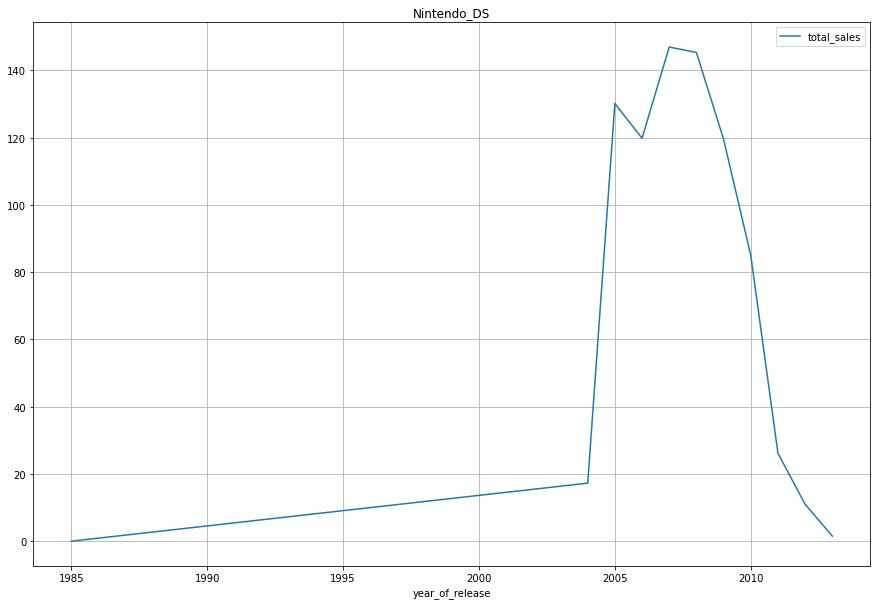

In [69]:
df_nds['total_sales'].plot(figsize=(15,10), grid=True, legend=True, title=console)

In [70]:
data[(data['platform'] == 'Nintendo_DS') & (data['year_of_release'] < 2004)]

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3081,3081,LEGO Harry Potter: Years 5-7,Nintendo_DS,0,Action,0.34,0.25,0.00,0.07,69,NaN,E10+,0.66
3289,3289,Advance Wars: Days of Ruin,Nintendo_DS,0,Strategy,0.43,0.12,0.00,0.05,86,8.7,E10+,0.60
5443,5443,Bejeweled 3,Nintendo_DS,0,Puzzle,0.29,0.02,0.00,0.02,75,NaN,E,0.33
5932,5932,Shrek the Third,Nintendo_DS,0,Action,0.26,0.01,0.00,0.02,70,6.5,E,0.29
9664,9664,Charm Girls Club: My Fashion Mall,Nintendo_DS,0,Simulation,0.12,0.00,0.00,0.01,0,NaN,E,0.13
9855,9855,The Daring Game for Girls,Nintendo_DS,0,Adventure,0.11,0.00,0.00,0.01,0,NaN,E,0.12
10486,10486,Atsumare! Power Pro Kun no DS Koushien,Nintendo_DS,0,Sports,0.00,0.00,0.10,0.00,0,NaN,unknown,0.10
10612,10612,My Healthy Cooking Coach,Nintendo_DS,0,Simulation,0.09,0.00,0.00,0.01,0,NaN,E,0.10
10686,10686,Happy Feet Two,Nintendo_DS,0,Action,0.08,0.01,0.00,0.01,0,NaN,E,0.10
10764,10764,Luminous Arc 2 (JP sales),Nintendo_DS,0,Role-Playing,0.00,0.00,0.10,0.00,0,NaN,unknown,0.10


На графике обнаружен артефакт - значение года выпуска игры в 1985, но тогда еще никакой Nintendo_DS не было. Запуск консоли состоялся в 2004 году. Проверим данные на условие - датавыхода игр для Nintendo_DS раньше 2004 года. Нули означают что дата выхода была неопределена. Перезапишем дата сет - df_nds отбросив строку с номером 15957.

<AxesSubplot:title={'center':'Nintendo_DS'}, xlabel='year_of_release'>

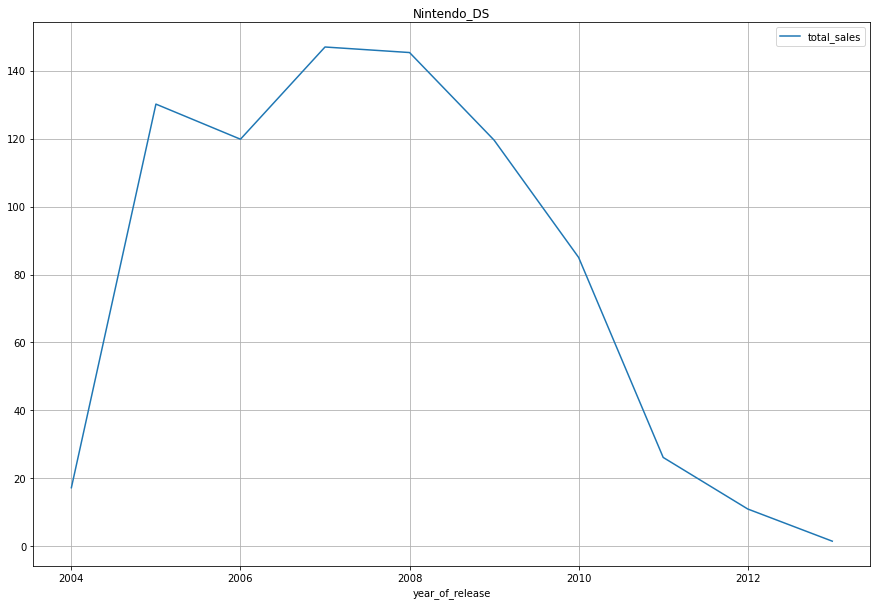

In [71]:
console = 'Nintendo_DS'
df_nds = data[(data['platform'] == console) & (data['year_of_release'] > 2003)][['platform', 'year_of_release', 'total_sales']]
df_nds = df_nds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_nds['total_sales'].plot(figsize=(15,10), grid=True, legend=True, title=console)

Nintendo_DS хорошо стартовала, на следующий год после выпуска, игры продавались более 120 млн.$ за год и эта планка не спадала до 2009года, а после 2010 заметен резкий спад интереса пользователей к данной консоли.

## Консоль - PS. Построим изменение продаж по годам.

In [72]:
#Соберем датасет исходя из необходимых данных и сразу исключим пропуски в данных - не включим в набор строки с year_of_release = 0
console = 'PS'
df_ps = data[(data['platform'] == console) & (data['year_of_release'] != 0)][['platform', 'year_of_release', 'total_sales']]
df_ps.head()

,platform,year_of_release,total_sales
52,PS,1997,10.95
65,PS,1997,9.72
67,PS,1999,9.49
88,PS,1999,7.86
95,PS,1997,7.57


Сгруппируем данные по годам и посчитаем суммарные продажи по годам с помощью сводной  таблицы.

In [73]:
df_ps = df_ps.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_ps

,total_sales
year_of_release,
1994,6.03
1995,35.96
1996,94.70
1997,136.17
1998,169.49
1999,144.53
2000,96.37
2001,35.59
2002,6.67


<AxesSubplot:title={'center':'PS'}, xlabel='year_of_release'>

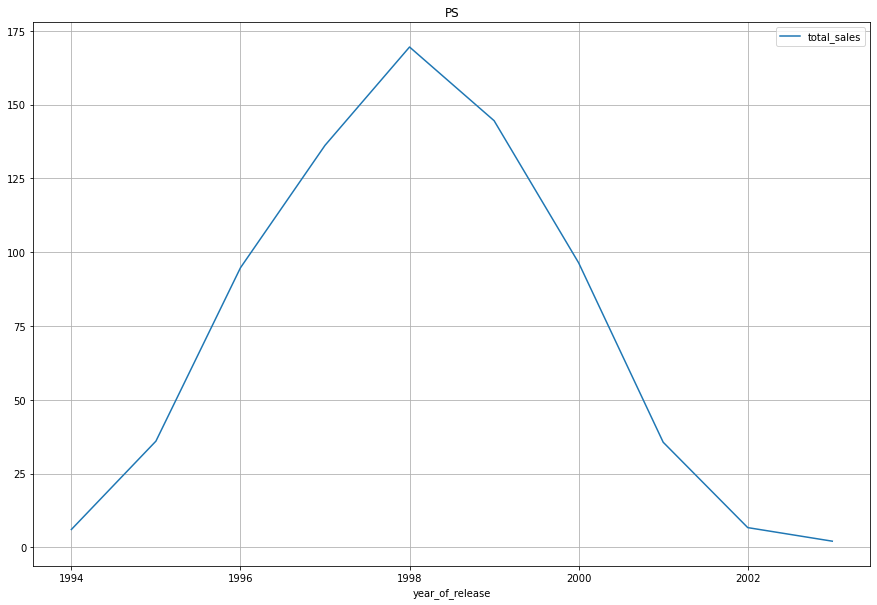

In [74]:
df_ps['total_sales'].plot(figsize=(15,10), grid=True, legend=True, title=console)

Первая PS стартовала в далеком 1994 году, спустя два года после выхода в 1996 продажи резко взлетели вверх и достигли отметки 94,7 млн.$. В 2000 году, продажи были на уровне 96,37 млн.$ в год, т.е. пять лет прибыль была выше 94 млн.$, а в пике 1998 - достигла 169,49 млн.$ в год.

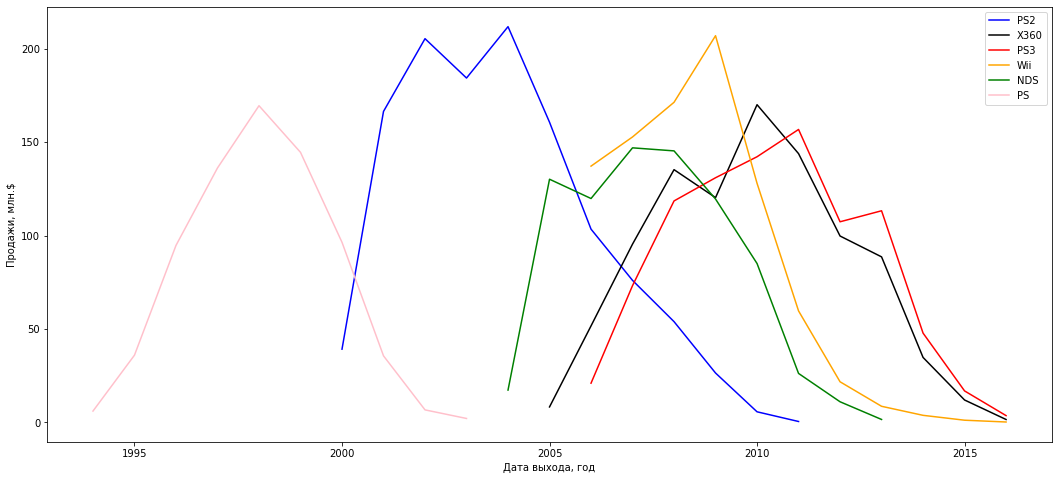

In [75]:
fig, ax = plt.subplots(figsize=(18, 8))

#x = np.arange(1996, 2016, 1)
y = df_ps2
z = df_x360
t = df_ps3
g = df_wii
e = df_nds
s = df_ps

ax.plot(y, color='blue', label='PS2')
ax.plot(z, color='black', label='X360')
ax.plot(t, color='red', label='PS3')
ax.plot(g, color='orange', label='Wii')
ax.plot(e, color='green', label='NDS')
ax.plot(s, color='pink', label='PS')
ax.legend()

ax.set_xlabel('Дата выхода, год')
ax.set_ylabel('Продажи, млн.$')

plt.show()

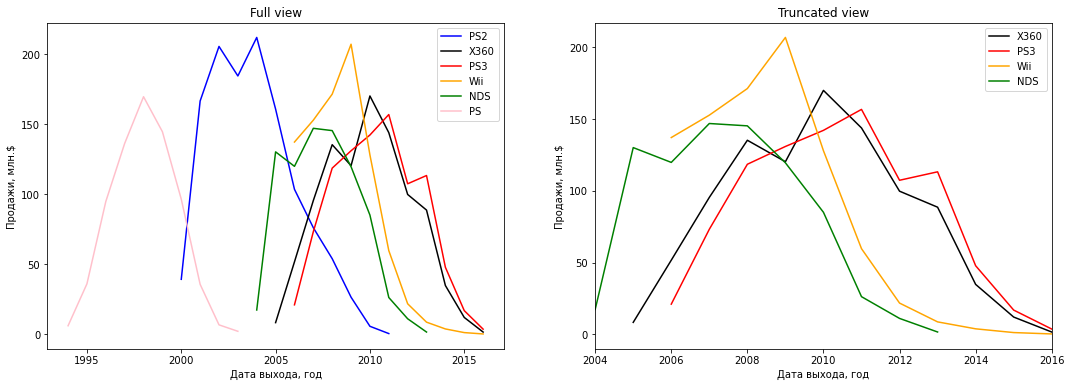

In [76]:
fig = plt.figure(figsize=(18, 6))

y = df_ps2
z = df_x360

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.set_xlabel('Дата выхода, год')
ax.set_ylabel('Продажи, млн.$')

ax2.set_xlabel('Дата выхода, год')
ax2.set_ylabel('Продажи, млн.$')

ax.set_title('Full view')
ax.plot(y, color='blue', label='PS2')
ax.plot(z, color='black', label='X360')
ax.plot(t, color='red', label='PS3')
ax.plot(g, color='orange', label='Wii')
ax.plot(e, color='green', label='NDS')
ax.plot(s, color='pink', label='PS')

ax2.set_title('Truncated view')
ax2.plot(z, color='black', label='X360')
ax2.plot(t, color='red', label='PS3')
ax2.plot(g, color='orange', label='Wii')
ax2.plot(e, color='green', label='NDS')

ax.legend()
ax2.legend()

ax2.set_xlim([2004, 2016])

plt.show()

На графиках прослеживается зависимость - от взлета по продажам до спада этих самых продаж проходит - 10 лет. Отсюда можно сделать вывод что срок жизни консоли - до 10 лет. Далее интерес пользователей угосает, по причине возможно появления новых консолей, либо по причине того что пользователи переходят в другую возрастную категорию. А новые молодые пользователи не приходят, т.к. им не интересно старое, они пополняют ряды новых, современных консолей. Пик продаж приходится на первые 4-6 лет жизненого цикла консоли. Значит, что бы определить выгодное напрвление на 2017 год, нам надо взять данные в интервале 2013-2016гг.

<div class="alert alert-success">
<h1> Комментарий ревьюера 👍 V2</h1>

Прекрасный анализ, молодец!
</div>

## Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Для дальнейшей работы зададимся временным интервалом - 2013-2016 гг. Эти данные помогут построить прогноз на 2017г.

<div class="alert alert-success">
<h1> Комментарий ревьюера 👍 V2</h1>

Согласен с выранным периодом)
</div>

## Какие платформы лидируют по продажам, растут или падают? Определим несколько потенциально прибыльных платформ.

In [77]:
data.head(2)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,unknown,40.24


In [78]:
#Соберем дата сет с данными по временному интервалу - 2013-2016гг.
yaer = [2013,2014,2015,2016]
data_period = data[data['year_of_release'].isin(yaer)]

In [79]:
df_platform_totalsales = data_period.pivot_table(index='platform', values='total_sales',aggfunc='sum').sort_values(by='total_sales', ascending=False)

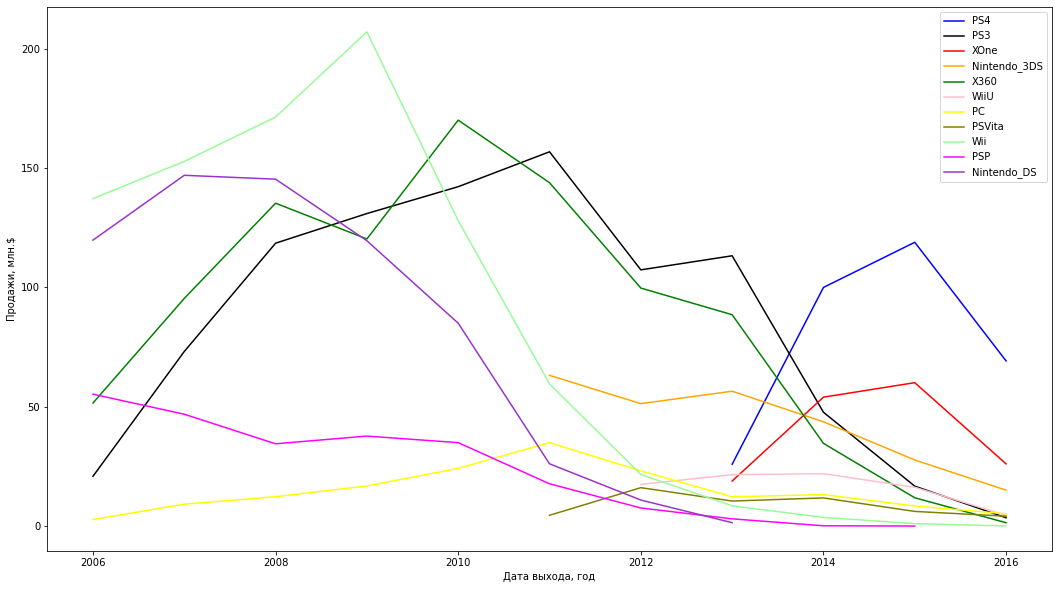

In [80]:
#Соберем датасет исходя из необходимых данных и выше перечисленных консолей
year = 2006
df_ps4 = data[(data['platform'] == 'PS4') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_ps3 = data[(data['platform'] == 'PS3') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_xone = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_n3ds = data[(data['platform'] == 'Nintendo_3DS') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_x360 = data[(data['platform'] == 'X360') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_wiiu = data[(data['platform'] == 'WiiU') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_pc = data[(data['platform'] == 'PC') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_psvita = data[(data['platform'] == 'PSVita') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_wii = data[(data['platform'] == 'Wii') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_psp = data[(data['platform'] == 'PSP') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_nds = data[(data['platform'] == 'Nintendo_DS') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')

fig, ax = plt.subplots(figsize=(18, 10))

y = df_ps4
z = df_ps3
t = df_xone
g = df_n3ds
e = df_x360
s = df_wiiu
q = df_pc
v = df_psvita
w = df_wii
r = df_psp
p = df_nds

ax.plot(y, color='blue', label='PS4')
ax.plot(z, color='black', label='PS3')
ax.plot(t, color='red', label='XOne')
ax.plot(g, color='orange', label='Nintendo_3DS')
ax.plot(e, color='green', label='X360')
ax.plot(s, color='pink', label='WiiU')
ax.plot(q, color='yellow', label='PC')
ax.plot(v, color='olive', label='PSVita')
ax.plot(w, color='palegreen', label='Wii')
ax.plot(r, color='magenta', label='PSP')
ax.plot(p, color='darkorchid', label='Nintendo_DS')
ax.legend()

ax.set_xlabel('Дата выхода, год')
ax.set_ylabel('Продажи, млн.$')

plt.show()

Если рассмотреть график начиная с 2006 года, т.к. жизненый цикл платформы в среднем составляет 10 лет как мы определили выше, то можно сразу выделить тех соискателей нашего исследования, которым пора на покой. Пики продаж следующих платформ уже прошли и х популярность падает: "Wii", "X360", "PS3", "Nintendo_DS", "PSP". Платформы "Nintendo_DS", "PSP" прекратили выпуск игр после 2013 и 2015 года соответственно.

Теперь выведем график из тех консолей, которые могут по моему мнению показать высокие продажи на 2017 год.

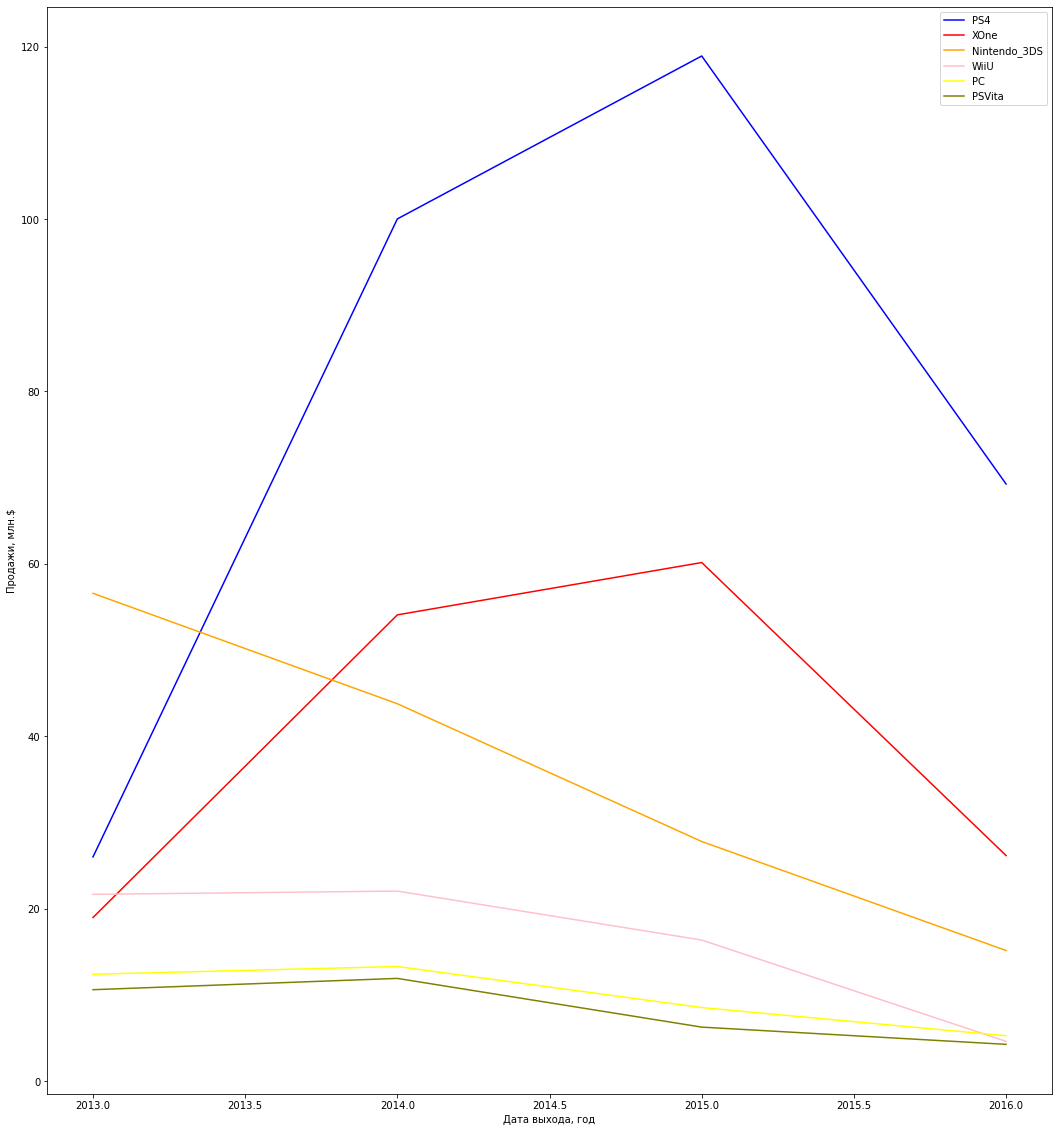

In [81]:
#Соберем датасет исходя из необходимых данных и выше перечисленных консолей
year = 2013
df_ps4 = data[(data['platform'] == 'PS4') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_xone = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_n3ds = data[(data['platform'] == 'Nintendo_3DS') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_wiiu = data[(data['platform'] == 'WiiU') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_pc = data[(data['platform'] == 'PC') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')
df_psvita = data[(data['platform'] == 'PSVita') & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')

fig, ax = plt.subplots(figsize=(18, 20))

y = df_ps4
t = df_xone
g = df_n3ds
s = df_wiiu
q = df_pc
v = df_psvita

ax.plot(y, color='blue', label='PS4')
ax.plot(t, color='red', label='XOne')
ax.plot(g, color='orange', label='Nintendo_3DS')
ax.plot(s, color='pink', label='WiiU')
ax.plot(q, color='yellow', label='PC')
ax.plot(v, color='olive', label='PSVita')
ax.legend()

ax.set_xlabel('Дата выхода, год')
ax.set_ylabel('Продажи, млн.$')

plt.show()

Какие выводы можно сделать по этому графику:
- платформа "PS4" является лидером по продажам игр с 2014 по 2016. Продажи игр для этой консоли в два раза выше чем у ближайшего конкурента. Считаю эту консоль приоритетной для проведения рекламных компаний.
- платформа "XOne" занимает второе место по продажам игр с 2014 по 2016 гг. Эта консоль тоже может считаться приоритетной целью рекламных компаний. Ниже поясню почему я так считаю*.
- третья в списке по продажам за приод 2014-2016 гг. "Nintendo_3DS" продажи игр этой "консоли" в два раза ниже чем у "XOne". Но тут надо сделать одно замечание, это не совсем консоль. Это портативная система, та которую пользователь всегда может взять с собой в кармане, она не требует никакого дополнительного подключения к монитору или телевизору. А значит, можно сказать, что эта платформа лидер по продажам игр среди портативных плтформ.
- четвертое место по продажам занимает персональный ПК. Это совершенно другая категория, которую сравнивать с остальными не корректно. ПК не имеет такой зависимости от жизненного цикла т.к. пользователь сам одновляет аппаратную составляющую. На предыдущем графике(2006-2016гг.) видно, что всплески продаж имеются, но это связанно с выходом каких нибудь пупулярных франшиз. Например, игры 2011 года:
        - The Elder Scrolls V: Skyrim. Дата выхода: 11 ноября 2011 года.
        - Battlefield 3. Дата выхода: 25 октября 2011 года.
        - Portal 2. Дата выхода: 18 апреля 2011 года.
        - Call of Duty: Modern Warfare 3. Дата выхода: 8 ноября 2011 года.
- пятое место у WiiU. Тут могу высказать свое мнение, эта платформа очень нишевая, т.е. категория её юзеров очень мала. Связано это с тем что выбор игр для нее узок и специфичен.
- платформа "PSVita" занимает последнее место среди всех платформ этого списка. Платформа является портативной и прямым конкурентом "Nintendo_3DS", который существенно обходит её. 

- *почему я считаю "PS4" и "XOne" приоритетными целями для рекламных компаний, а не какую-то из них конкретно. Продажи игр зависят от того какая именно игра выходит на той или иной платформе. Большинство игр являются кроссплатформенными т.е. выходят на всех платформах почти одновременно, но есть и исключения, которые выходят эксклюзивно только на одной платформе. Значит необходимо для полной картины рассмотреть список выходящих игр на 2017 год. Это помогло бы более точно определиться с напрвление для рекламной компании. Так же, надо учитывать настрой и самих пользователей той или иной платформы. Например "XOne" на момент запуска проиграла по всем статьям своему прямому конкуренту "PS4". Отсюда и такие низкие стартовые продажи в сравнении с "PS4".

Вывод.

Среди консолей по продажам победитель "PS4".
Среди портативных платформ лидер "Nintendo_3DS".

In [82]:
data.head()

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,unknown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,Game_Boy,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,unknown,31.38


## Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [83]:
best_platform = ['PS4','XOne','Nintendo_3DS','WiiU','PC','PSVita']
df_platform_totalsales = df_platform_totalsales.reset_index()

In [84]:
df_platform_totalsales = df_platform_totalsales[df_platform_totalsales['platform'].isin(best_platform)]

In [85]:
#df_platform_totalsales.boxplot(figsize=(15,10),column='total_sales', by='platform')

Зеленые линии это медианные продажи по платформам. Значения этотго графика отображают распределение медиан для этих платформ.

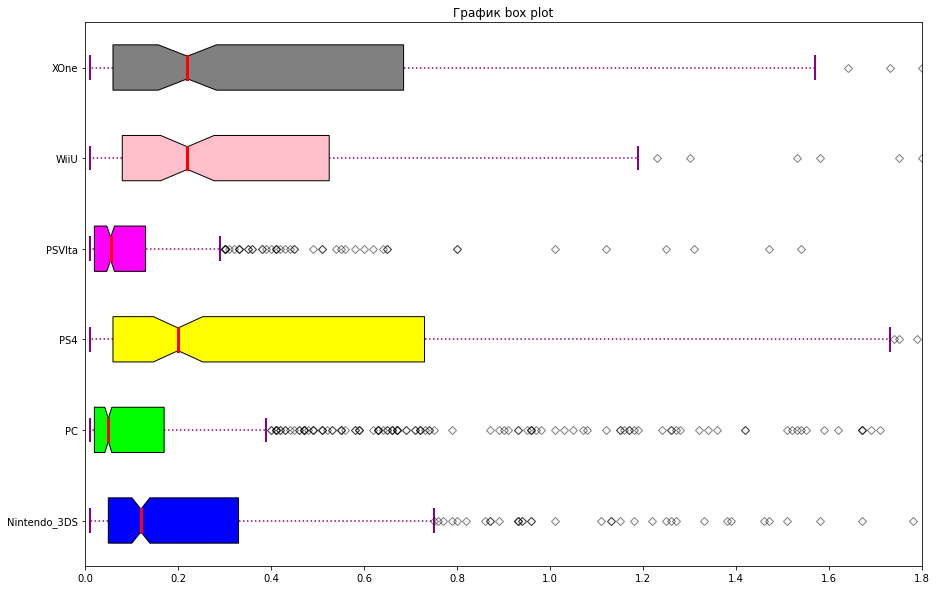

In [86]:
df = data

#Создаем данные
data_1 = df['total_sales'][df['platform'] == 'Nintendo_3DS']
data_2 = df['total_sales'][df['platform'] == 'PC']
data_3 = df['total_sales'][df['platform'] == 'PS4']
data_4 = df['total_sales'][df['platform'] == 'PSVita']
data_5 = df['total_sales'][df['platform'] == 'WiiU']
data_6 = df['total_sales'][df['platform'] == 'XOne']

dataf = [data_1, data_2, data_3, data_4, data_5, data_6]

fig = plt.figure(figsize =(15, 10))
ax = fig.add_subplot(111)

#Создание осей
bp = ax.boxplot(dataf, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
        '#FFFF00', '#FF00FF', 'pink', 'grey']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

#изменение цвета и толщины линий усов
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

#изменение цвета и толщины линий з.
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

#изменение цвета и толщины линий медианы
for median in bp['medians']:
    median.set(color ='red',
            linewidth = 3)

#изменение цвета фильтра
for flier in bp['fliers']:
    flier.set(marker ='D',
            color ='#e7298a',
            alpha = 0.5)

#название осей
ax.set_yticklabels(['Nintendo_3DS', 'PC',
                    'PS4', 'PSVIta', 'WiiU', 'XOne'])

#заголовок
plt.title("График box plot")

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

#изменение масштаба по оси Х
plt.xlim(0, 1.8)

plt.show()

Напишу функцию , которая соберет в одну таблицу значения метода describe для рассматриваемых платформ и столбца "total_sales".

In [87]:
def describe_table(df, list):
    pltfrm = []
    mean_ = []
    std_ = []
    min_ = []
    q1 = []
    q2 = []
    q3 = []
    max_ = []
    
    for item in list:
        #print(item)
        x = df['total_sales'][df['platform'] == item].describe().values
        #print(x)
        pltfrm.append(item)
        mean_.append(x[1])
        std_.append(x[2])
        min_.append(x[3])
        q1.append(x[4])
        q2.append(x[5])
        q3.append(x[6])
        max_.append(x[7])
    df_summary = pd.DataFrame({'platform': pltfrm,
                             'mean': mean_,
                             'std': std_,
                             'min': min_,
                             'q1': q1,
                             'q2': q2,
                             'q3': q3,
                             'max': max_})
    return df_summary

In [88]:
describe_table(data, best_platform).sort_values(by='mean', ascending=False)

,platform,mean,std,min,q1,q2,q3,max
0,PS4,0.801378,1.609456,0.01,0.06,0.200,0.730,14.63
1,XOne,0.645020,1.036139,0.01,0.06,0.220,0.685,7.39
3,WiiU,0.559116,1.058836,0.01,0.08,0.220,0.525,7.09
2,Nintendo_3DS,0.498077,1.430876,0.01,0.05,0.120,0.330,14.60
4,PC,0.266448,0.675577,0.01,0.02,0.050,0.170,8.01
5,PSVita,0.125744,0.212193,0.01,0.02,0.055,0.130,1.96


<div class="alert alert-danger">
<h1> Комментарий ревьюера ❌ V2</h1>
    
Нас все же просят построить ящики с усами, а не только продемонстрировать медианы</div>

<div class="alert alert-info">
<h1> Комментарий студента 2</h1>
    
    - Исходный график - "Ящик с усами" закоментировал. В нем была ошибка в том, что он был построен на итоговых суммарных данных по продажам. Из-за этого на нем небыло видно ни усов ни ящика.
    
    - Для наглядного отображения и сравнения графиков, изменил масштаб по оси "Х". Из-за этого, часть выбросов - все, что правее правого "уса" не видна. Правый "ус" - это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Третий квартиль это правая граница цветного  прямоугольника на графика.
    
    - Так же для анализа результатов можно воспользоваться значениями из таблицы "describe_table".
    
    Приступим к анализу полученных результатов:
        - Посмотрим на стандартное отклонение, минимальное значение имеет "PSVita" - 0,21 что говорит о том , что доход в среднем одинаковый. По другому можно сказать, что доход имеет малый разброс. Интересо отметить, что медиана "PSVita" со значением - 0,055 даже выше медианы "PC" - 0,05 при том что среднее значение у "PC" в два раза больше. 
        - Платформа "PC" имеет в трое больший разброс чем "PSVita". Такой разброс говорит о том, что есть и хорошие проекты - прибыльгые и провальные. 
        - Платформа "Nintendo_3DS" имеет среднее вдва раза выше чем у "PC", казалось бы превосходный результат особенно в купе с тем, что максимум на уровне "PS4" - "короля рынка". Но стандартное отклонение со значением 1,4 указывает на то, что при наличие хороших проектов на данной платформе, кол-во слабых достаточно велико. Значение медианы тоже хорошо характеризует этого игрока, она в два раза больше чем у обладателей 6 и 5 строчки и в вто же время в два раза меньше 3-го места. Про "Nintendo_3DS" можно сказать, что это та платформа, проектам которой не хватает стабильности. То получается великолепные проекты, то полные провалы. 
        - WiiU занимает трете место в этой таблице по средним показателям. Стандартное отклонение говорит о том что разброс в удачных и не очень проектах все же присутствует. Но с другой стороны можно обратить внимание на то, что показатели очень близки к показателям второй строчки.
        - А на второй строчке "XOne", платформа которая на протяжении всех сравнительных анализов этого исследования борется с "PS4". И здесь можно сказать что она близка к победе. Стандартное отклонение значительно меньше, чем у основного конкурента, что говорит о большей стабильности успехов проектов. Медиана выше и является максимальным на равне с "WiiU"  в нашем сравнительном анализе. Подводит лишь максимальная прибыль, которая у лидера в два раза больше.
        - Что можно сказать о "PS4", медианное значение не самое большое, но максимальное в два раза выше чем  половины участников этой таблицы. Отсюда мы и получаем такое большое стандартное отклонение - 1,61.
</div>

<div class="alert alert-success">
<h1> Комментарий ревьюера 👍 V3</h1>

Отличная визуализация и выводы)
</div>

## Определим, как влияют на продажи внутри одной популярной платформы - "PS4" отзывы пользователей и критиков. Пострим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [89]:
#Исключим из анализа данные: пользовательские оценки - не определены и оценки критиков - "0". Т.к. эти данные будут искажать картину
data_scatter_ps4 = data[(data['platform'] == 'PS4') & (data['user_score'] != 'tbd') & (data['critic_score'] > 0)][['user_score', 'critic_score', 'total_sales']]
data_scatter_ps4

,user_score,critic_score,total_sales
42,8.3,97,12.62
77,4.3,82,8.58
92,5.7,83,7.66
94,5.0,85,7.60
105,6.5,87,7.17
...,...,...,...
16486,2.3,42,0.01
16499,6.8,70,0.01
16500,7.5,69,0.01
16526,7.9,61,0.01


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

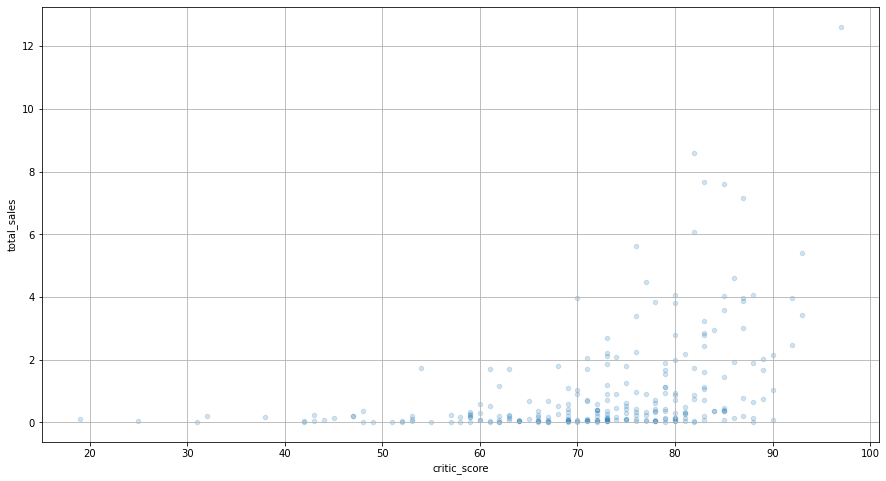

In [90]:
data_scatter_ps4.sort_values(by='critic_score').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,8), grid=True, alpha=0.2)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

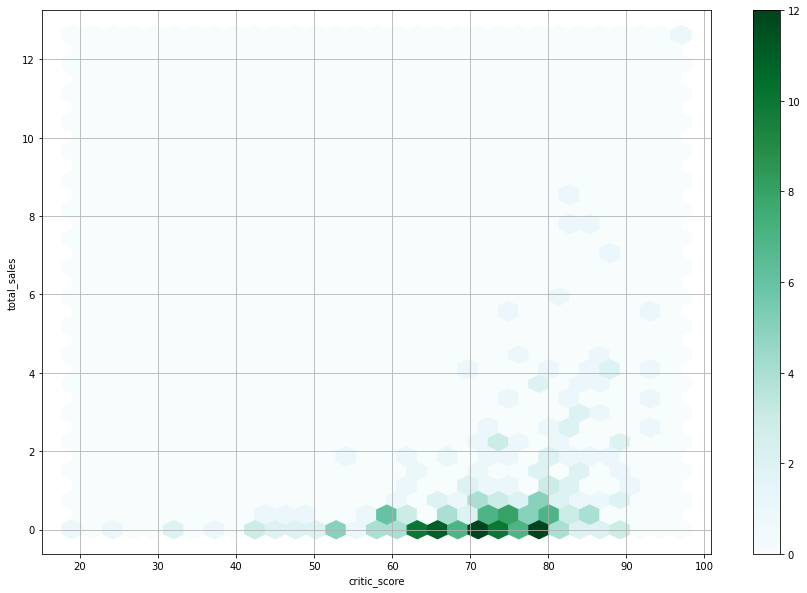

In [91]:
data_scatter_ps4.sort_values(by='critic_score').plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True) 

In [92]:
print('Коэффициент корреляции равен:',data_scatter_ps4['critic_score'].corr(data_scatter_ps4['total_sales']),'для оценок критиков и продаж.')

Коэффициент корреляции равен: 0.40656790206178123 для оценок критиков и продаж.


Значение коэффичиента кореляции больше "0" говорит о том, что есть небольшая зависимость между оценками критиков и продажами.

По графику можно заметить, что отдельные проекты, которые получили оценки критиков выше 80 пунктов, сумели ддостич продаж почти 80млн. Проекты попавшие в рейтинге в диапазон 70-80 пугктов смогли достич продаж 4млн. А вот проекты с рейтингом ниже 70 пунктов уже не перевалили за отметку в 2 млн. Игры с рейтингами от 40 до 60 показывают совсем малые продажи, относительно остальных. Из выше перечисленного можно заключить, что прослеживается некая корреляция между оценками критиков и продажами игр.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

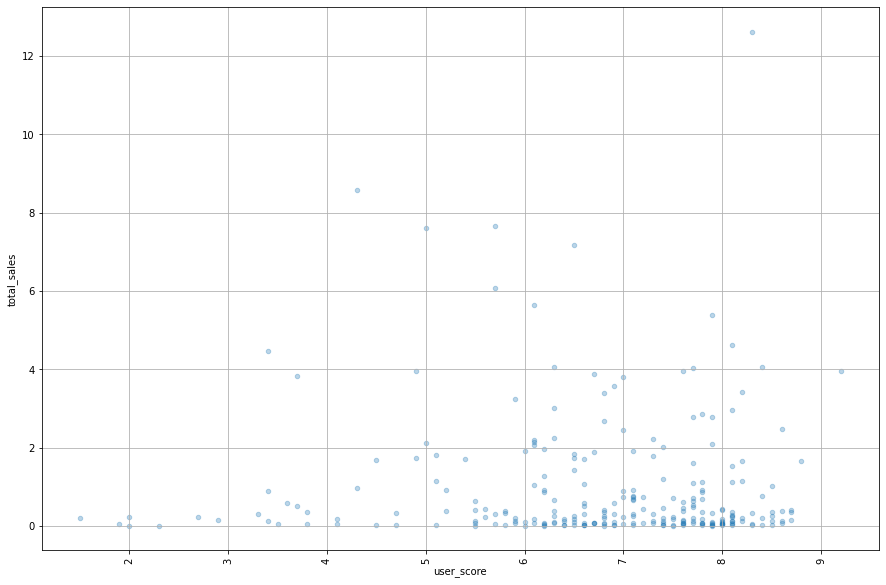

In [93]:
data_scatter_ps4.sort_values(by='user_score').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10), grid=True, alpha=0.3, rot=90)

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

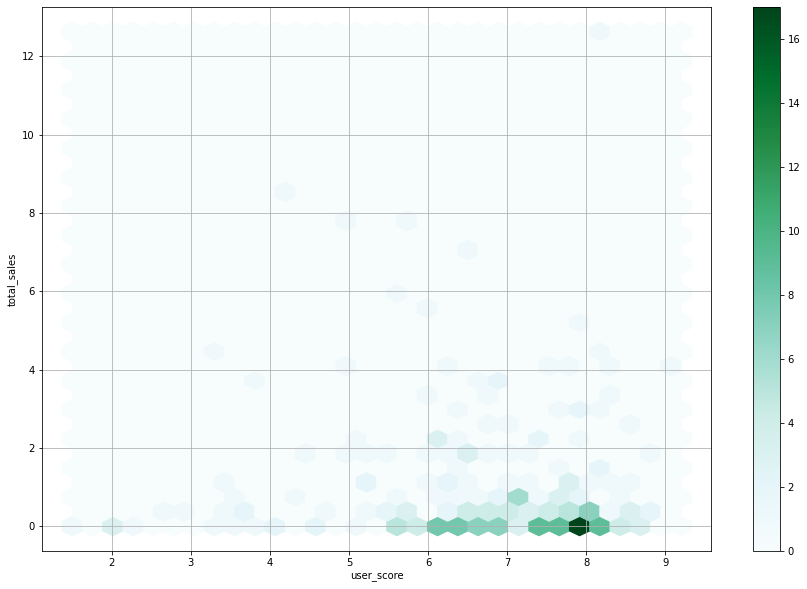

In [94]:
data_scatter_ps4.sort_values(by='user_score').plot(x='user_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True)

In [95]:
print('Коэффициент корреляции равен:',data_scatter_ps4['user_score'].corr(data_scatter_ps4['total_sales']),'для оценок пользователей и продаж.')

Коэффициент корреляции равен: -0.033624974472071655 для оценок пользователей и продаж.


Значение коэффичиента близко к "0", это говорит о том, что зависимости нет.

Пользователи не так согласованно ставят оценки как критики. Есть некоторое количество проектов получивших оценки в районе 6,1 но про этом продажи были выше 2млн. Так же в качестве примера, оценки проектов выше 8,2 пунктов, но продажи эти проектов были в основном ниже чем у игр с меньшими оценками. Из этого я хочу сделать вывод, что ченки пользователей не сильно влияют на продажи.

## Сопоставим выводы с продажами игр на других платформах.

## Платформа XOne.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

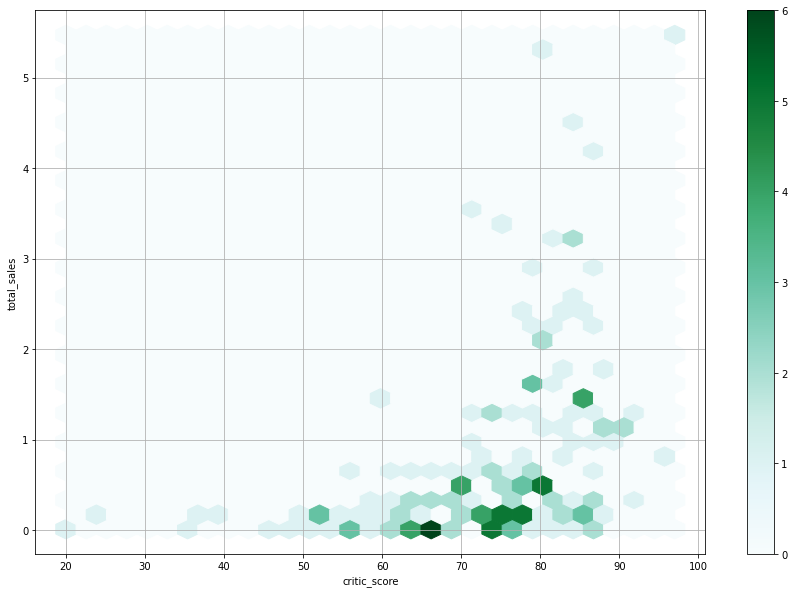

In [96]:
data_scatter_xone = data[(data['platform'] == 'XOne') & (data['user_score'] != 'tbd') & (data['critic_score'] > 0)][['user_score', 'critic_score', 'total_sales']]
data_scatter_xone.sort_values(by='critic_score').plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True) 

Оценки критиков хорошо сказываются на продажах. Прослеживается зависимость хороших оценок и больших продаж.

In [97]:
print('Коэффициент корреляции равен:',data_scatter_xone['critic_score'].corr(data_scatter_xone['total_sales']),'для оценок критиков и продаж.')

Коэффициент корреляции равен: 0.41699832800840153 для оценок критиков и продаж.


Значение коэффициента кореляции показывает что зависимость между оценками критиков и продажами есть.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

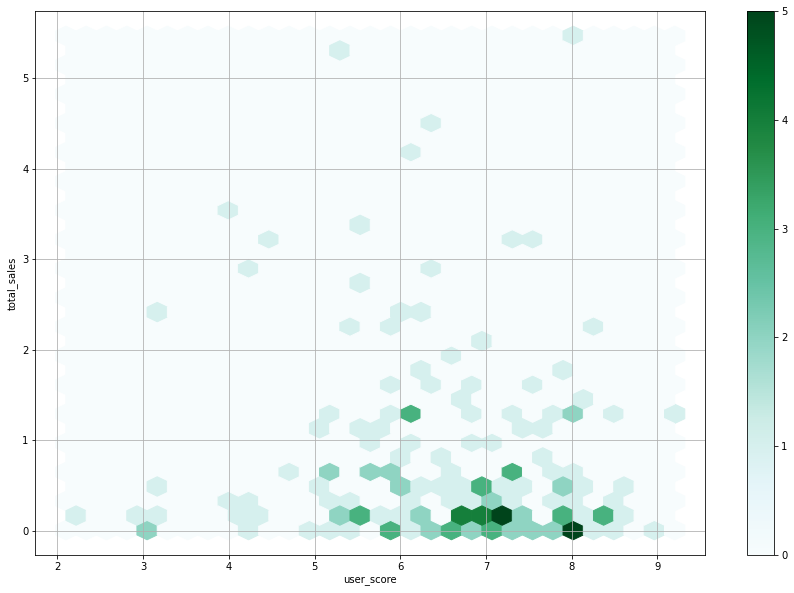

In [98]:
data_scatter_xone.sort_values(by='user_score').plot(x='user_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True)

А вот на этом графике нет четкого ответа на вопрос есть ли зависимость. Хорошо прослеживается то что игры с рейтингом пользователей от 6,5 до 8,5 имели хорошие продажи. А вот игры с рейтингом 9 и выше имели продажи ниже.

In [99]:
print('Коэффициент корреляции равен:',data_scatter_xone['user_score'].corr(data_scatter_xone['total_sales']),'для оценок пользователей и продаж.')

Коэффициент корреляции равен: -0.09400318160486217 для оценок пользователей и продаж.


Значение коэффициента кореляции показывает что зависимость между оценками игроков и продажами отсутствует.

## Платформа Nintendo 3DS.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

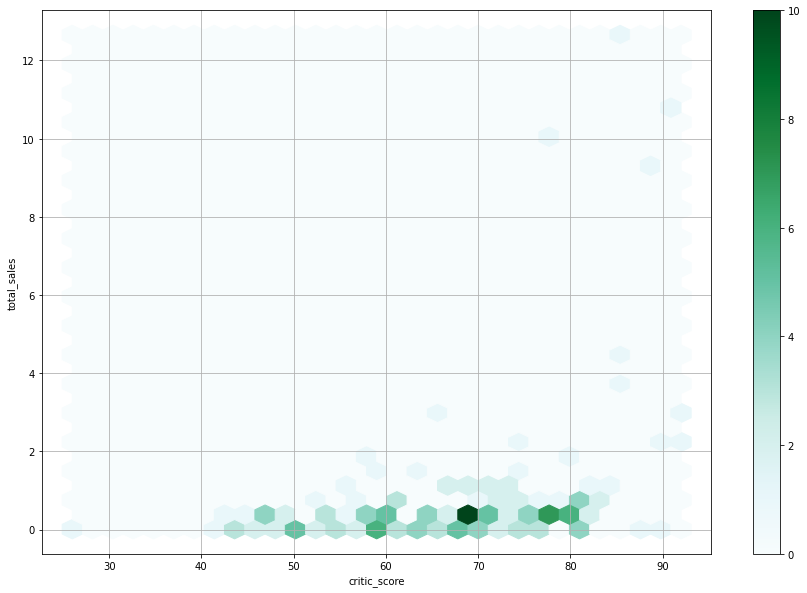

In [100]:
data_scatter_n3ds = data[(data['platform'] == 'Nintendo_3DS') & (data['user_score'] != 'tbd') & (data['critic_score'] > 0)][['user_score', 'critic_score', 'total_sales']]
data_scatter_n3ds.sort_values(by='critic_score').plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True) 

Оценки критиков не особенно способствуют продажам для данной платформы. Большинство продаж нахлжится в диапазоне оценок от 60-80.

In [101]:
print('Коэффициент корреляции равен:',data_scatter_n3ds['critic_score'].corr(data_scatter_n3ds['total_sales']),'для оценок критиков и продаж.')

Коэффициент корреляции равен: 0.3494009303924132 для оценок критиков и продаж.


Значение коэффициента кореляции показывает что зависимость между оценками критиков и продажами есть, но она очень мала.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

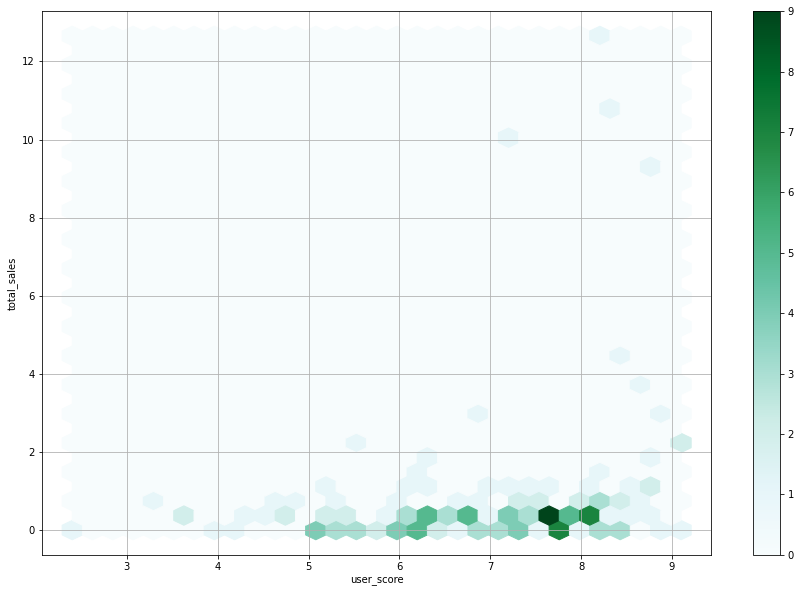

In [102]:
data_scatter_n3ds.sort_values(by='user_score').plot(x='user_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True)

Для данной платформы получили наибольший по модулю коэффициент кореляции, что видно и на графике. Небольшая зависимость количества продаж от оценок пользователей все же прослеживается .

In [103]:
print('Коэффициент корреляции равен:',data_scatter_n3ds['user_score'].corr(data_scatter_n3ds['total_sales']),'для оценок пользователей и продаж.')

Коэффициент корреляции равен: 0.2334027130874046 для оценок пользователей и продаж.


Значение коэффициента кореляции показывает что зависимость между оценками критиков и продажами есть, но она очень и очень мала.

## Платформа WiiU

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

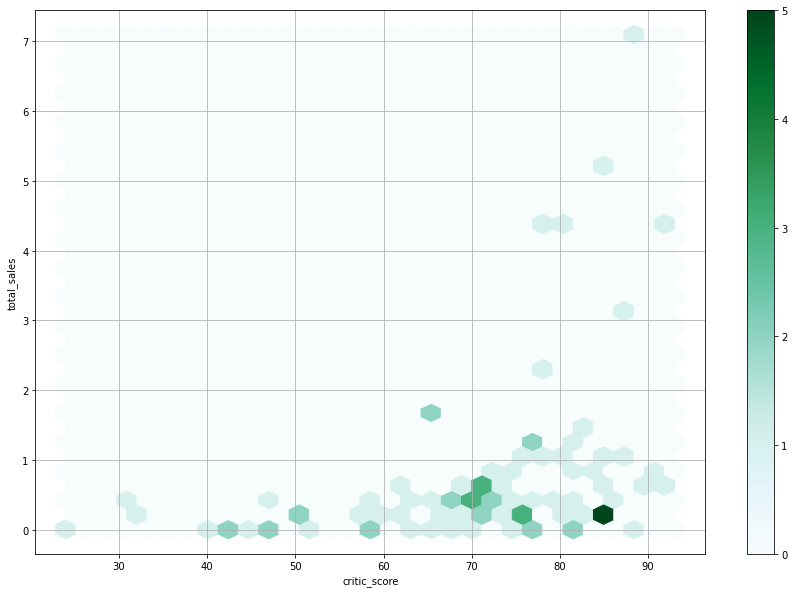

In [104]:
data_scatter_wiiu = data[(data['platform'] == 'WiiU') & (data['user_score'] != 'tbd') & (data['critic_score'] > 0)][['user_score', 'critic_score', 'total_sales']]
data_scatter_wiiu.sort_values(by='critic_score').plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True) 

Оценки критиков хорошо сказываются на продажах. Прослеживается небольшая зависимость хороших оценок и больших продаж.

In [105]:
print('Коэффициент корреляции равен:',data_scatter_wiiu['critic_score'].corr(data_scatter_wiiu['total_sales']),'для оценок критиков и продаж.')

Коэффициент корреляции равен: 0.34837976012017496 для оценок критиков и продаж.


Значение коэффициента кореляции показывает что зависимость между оценками критиков и продажами есть, но она очень мала.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

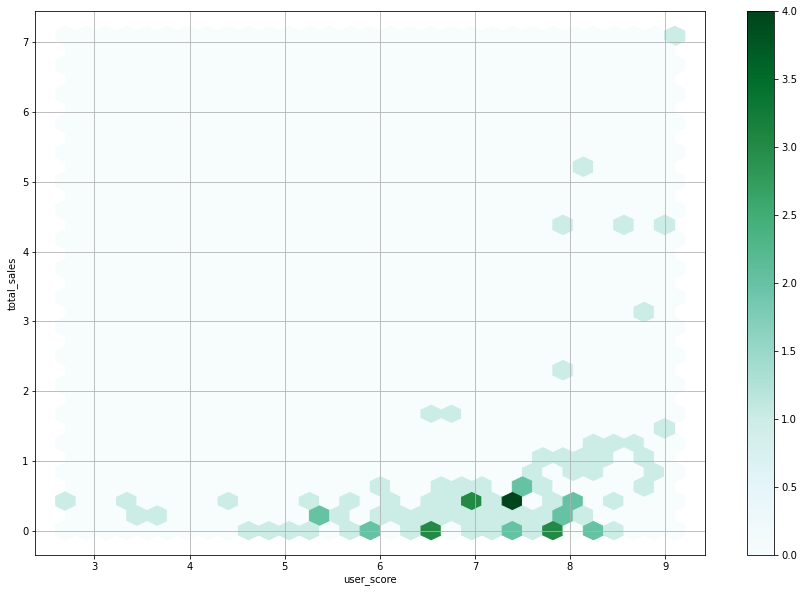

In [106]:
data_scatter_wiiu.sort_values(by='user_score').plot(x='user_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True)

Оценки пользователей хорошо сказываются на продажах. Прослеживается небольшая зависимость хороших оценок и больших продаж.

In [107]:
print('Коэффициент корреляции равен:',data_scatter_wiiu['user_score'].corr(data_scatter_wiiu['total_sales']),'для оценок пользователей и продаж.')

Коэффициент корреляции равен: 0.39184797192909593 для оценок пользователей и продаж.


Значение коэффициента кореляции показывает что зависимость между оценками пользователей и продажами есть.

## Платформа PC.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

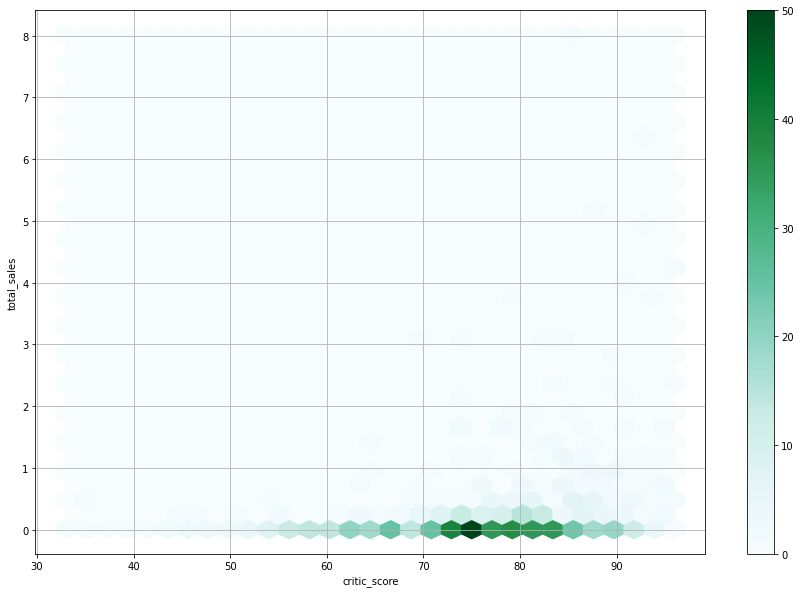

In [108]:
data_scatter_pc = data[(data['platform'] == 'PC') & (data['user_score'] != 'tbd') & (data['critic_score'] > 0)][['user_score', 'critic_score', 'total_sales']]
data_scatter_pc.sort_values(by='critic_score').plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True) 

Для персональных компьютереов не видно зависимости оценок критиков и продаж.

In [109]:
print('Коэффициент корреляции равен:',data_scatter_pc['critic_score'].corr(data_scatter_pc['total_sales']),'для оценок критиков и продаж.')

Коэффициент корреляции равен: 0.2568867378948211 для оценок критиков и продаж.


Значение коэффициента кореляции показывает что небольшая зависимость оценок критиков и продаж есть.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

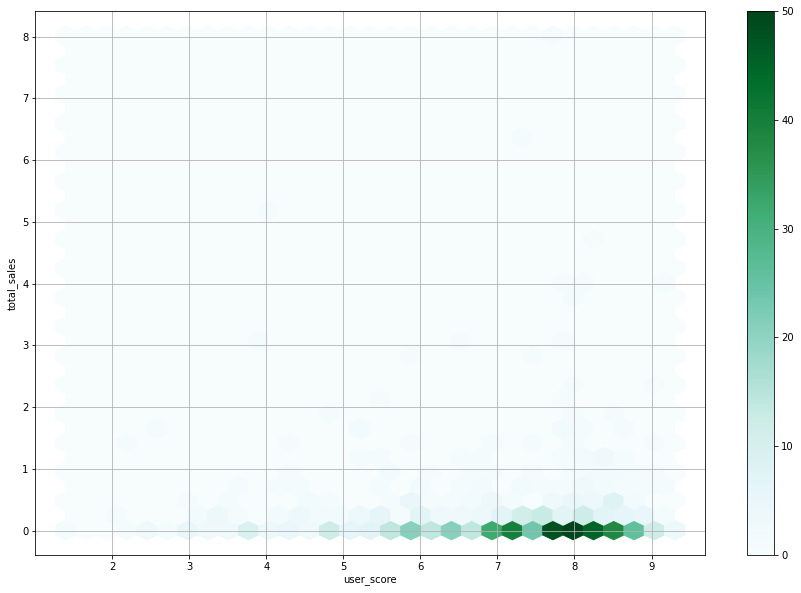

In [110]:
data_scatter_pc.sort_values(by='user_score').plot(x='user_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True)

По графику видно что большая часть продаж приходится на  оценки 7-9 баллов, значит оценки пользователей не окзывают существенного влияния на продажи.

In [111]:
print('Коэффициент корреляции равен:',data_scatter_pc['user_score'].corr(data_scatter_pc['total_sales']),'для оценок пользователей и продаж.')

Коэффициент корреляции равен: 0.001107889547213688 для оценок пользователей и продаж.


Значение коэффициента кореляции близко к "0" значит зависимости между оценками пользователей и продажами нет.

## Платформа PSVita.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

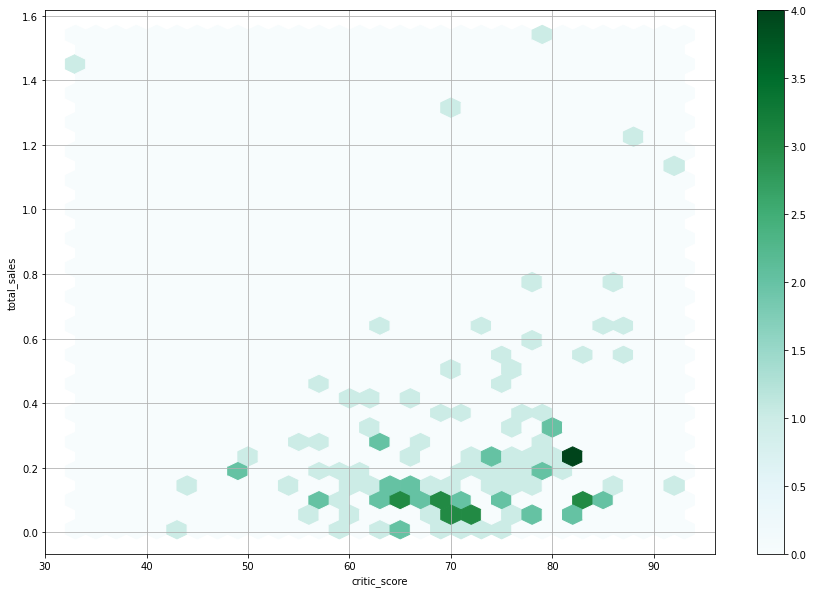

In [112]:
data_scatter_psvita = data[(data['platform'] == 'PSVita') & (data['user_score'] != 'tbd') & (data['critic_score'] > 0)][['user_score', 'critic_score', 'total_sales']]
data_scatter_psvita.sort_values(by='critic_score').plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True) 

Для персональных компьютереов не видно зависимости оценок критиков и продаж.

In [113]:
print('Коэффициент корреляции равен:',data_scatter_psvita['critic_score'].corr(data_scatter_psvita['total_sales']),'для оценок критиков и продаж.')

Коэффициент корреляции равен: 0.13151672154292648 для оценок критиков и продаж.


Значение коэффициента кореляции близко к "0" значит зависимости между оценками пользователей и продажами практически нет.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

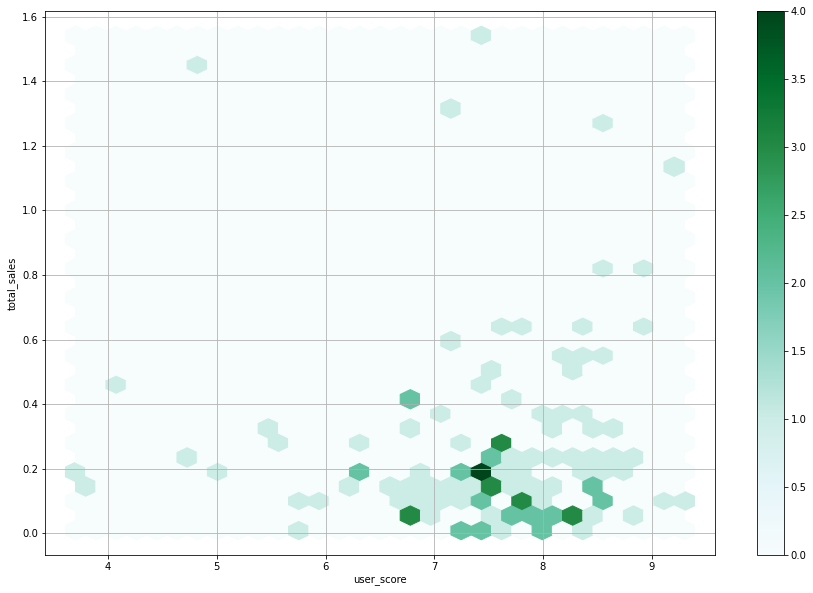

In [114]:
data_scatter_psvita.sort_values(by='user_score').plot(x='user_score', y='total_sales', kind='hexbin', gridsize=30, figsize=(15, 10), sharex=False, grid=True)

По графику видно что большая часть продаж приходится на  оценки 7-8,5 баллов, значит оценки пользователей не окзывают существенного влияния на продажи.

In [115]:
print('Коэффициент корреляции равен:',data_scatter_psvita['user_score'].corr(data_scatter_psvita['total_sales']),'для оценок пользователей и продаж.')

Коэффициент корреляции равен: 0.03837422300276567 для оценок пользователей и продаж.


Значение коэффициента кореляции близко к "0" значит зависимости между оценками пользователей и продажами практически нет.

<div class="alert alert-success">
<h1> Комментарий ревьюера 👍 V2</h1>

Отличный анализ влияния оценок на продажи!
</div>

## Посмотрим на общее распределение игр по жанрам. Определим самые прибыльные жанры? Выделяются ли жанры с высокими и низкими продажами?

In [116]:
data_genre = data[data['year_of_release'] >= 2013].pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)#.reset_index()
data_genre

,total_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


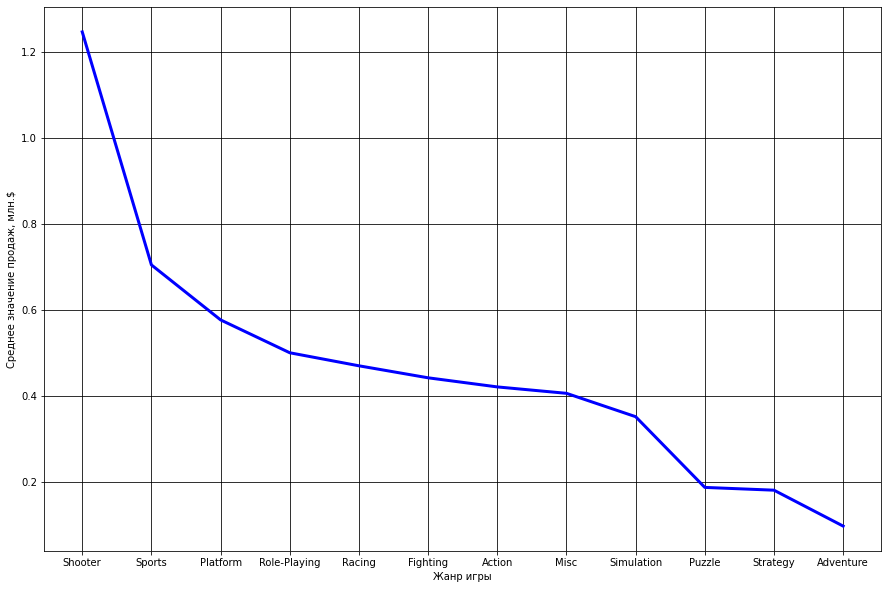

In [117]:
x = data_genre

fig, ax = plt.subplots()

ax.plot(x, color = 'b', linewidth = 3)

fig.set_figwidth(15)
fig.set_figheight(10)

ax.set_xlabel('Жанр игры')
ax.set_ylabel('Среднее значение продаж, млн.$')

#  Добавляем линии основной сетки:
ax.grid(which='major',
        color = 'k')

plt.show()

In [118]:
print('Список самых прибыльных жанров:',list(data_genre.reset_index().loc[:3]['genre']))

Список самых прибыльных жанров: ['Shooter', 'Sports', 'Platform', 'Role-Playing']


Согласно середней прибыли самый прибыльный жанр - "Shooter", среднии продажи выше 1.2млн. Второй по прибольности жанр - "Sport" со значением 0.7 млн. Платформеры на третьем месте со значением средних продаж 0,58млн. RPG занимают четвертую строчку со значением 0,49млн. Остальные жанры -  'Racing', 'Fighting', 'Action', 'Misc' находятся достаточно близко друг от друга. Это были самые популярные жанры.

<div class="alert alert-danger">
<h1> Комментарий ревьюера ❌ V2</h1>
    
Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.</div>

<div class="alert alert-success">
<h1> Комментарий ревьюера 👍 V3</h1>

Видишь, как поменялась картина)
</div>

# Шаг 4. Составим портрет пользователя каждого региона.

## Регион северная америка.

### Определим самые популярные платформы в северной америке.

In [119]:
data.head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54


In [120]:
users = 'na_sales'
idx = 'platform'

df_na_sales = data[(data['year_of_release'] >= 2013) & 
                   (data[users] > 0)].pivot_table(index=idx, 
                   values=users, aggfunc='sum').sort_values(by=users, 
                     ascending=False).reset_index().head()
print('Топ-5 популярнах платформ в северной америке:', list(df_na_sales[idx]))

Топ-5 популярнах платформ в северной америке: ['PS4', 'XOne', 'X360', 'PS3', 'Nintendo_3DS']


In [121]:
df_na_sales

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,Nintendo_3DS,38.20


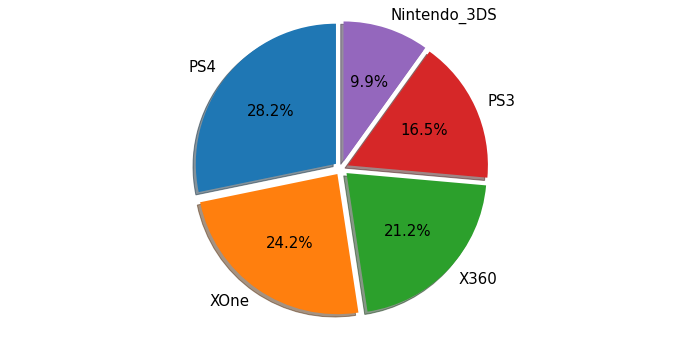

In [122]:
labels = list(df_na_sales['platform'])
sizes = list(df_na_sales['na_sales'])

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

В северной америке лидеры продаж PS4 и XOne, класические консоли последнего поколения. Лидерство первой можно объяснить удачным выбором разработчиков консоли направлености на игры, по сравнению с американским конкурентом. XOne изначально планировалась как многофункциональная приставка для дома, телевидение, игры - все в одном. Отсюда высокая цена и ненужные функции. Платформы прошлого поколения X360 и PS3 уступают новичкам. В свою очередь X360 обходит заокеанских конкурентов прошлого поколения скорее всего потому что майкрософт это домашний рынок и они знают что нужно пользователям. В конце нашего топ-5 находится Nintendo_3DS, которая уступает лидирующие позиции лидерам рынка.

### Определим самые популярные жанры в северной америке.

In [123]:
users = 'na_sales'
idx = 'genre'

df_na_genre = data[(data['year_of_release'] >= 2013) & 
                   (data[users] > 0)].pivot_table(index=idx, 
                   values=users, aggfunc='sum').sort_values(by=users, 
                     ascending=False).reset_index().head()
print('Топ-5 популярнах жанров в северной америке:', list(df_na_genre[idx]))

Топ-5 популярнах жанров в северной америке: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


In [124]:
df_na_genre

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


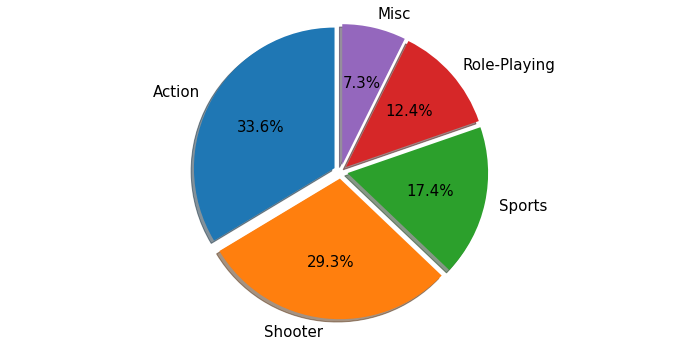

In [125]:
labels = list(df_na_genre['genre'])
sizes = list(df_na_genre['na_sales'])

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

Топ-5 популярных жанров игр в северной америке - 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'. Первые два уверенно держат лидерство имея небольшой разрыв между собой. Это самые эмоциональные жанры, игры этих жанров захватывают и держат аудиторию любых возрастов. Освоить управление и гровой процесс достаточно легко. Игры спортивного жанра, достаточно узконаправленные игры, тут своя аудитория, отсюда и такой разрыв от второго места. И я уверен, что большая часть игроков этой аудитории, это игроки серии футбольных симуляторов. Жанр РПГ, имеет 5% отстование от спортивного, этот тот случай когда нужно сильно погружаться в игровой процесс, осваивать местами сложгое управление и понимать тонкости баланса игрового процесса, отсюда и такой результат. Пятый притендент так же на пять процентов отстает от предыдущего, это говорит о том что этот жанр еще менее популярен в северной америке.

### Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [126]:
users = 'na_sales'
idx = 'rating'

df_na_rating = data[(data['year_of_release'] >= 2013) & 
                   (data[users] > 0)].pivot_table(index=idx, 
                   values=users, aggfunc='sum').sort_values(by=users, 
                     ascending=False).reset_index().head()
print('Топ-5 популярнах рейтингов в северной америке:', list(df_na_rating[idx]))

Топ-5 популярнах рейтингов в северной америке: ['M', 'unknown', 'E', 'E10+', 'T']


In [127]:
df_na_rating

,rating,na_sales
0,M,165.21
1,unknown,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


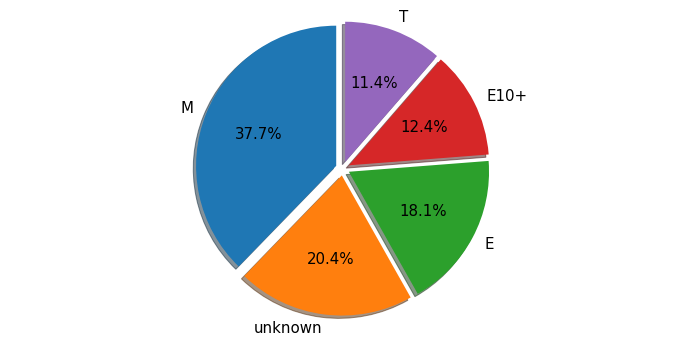

In [128]:
labels = list(df_na_rating['rating'])
sizes = list(df_na_rating['na_sales'])

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

Описание абривиатур:
- «E» («Everyone») — «Для всех»;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «T» («Teen») — «Подросткам»;
- «M» («Mature») — «Для взрослых»;
- «unknown» - не определен на момент составления списка.

Логично что большинство игр находятся в рейтинге "М", это самая большая аудитория, да и к тому же наверняка эти рейтинги не соблюдаются. Вторая по объему в этоп топ-5 списке категория игр для которых не определен рейтинг. Возможно это вышло по тому что рейтинг еще не был присвоен, либо это пропуски в данных. Третья категория - игры для всех. Четвертая категория - игры для всех от 10 лет и старше. На мой взгляд, логично, что игры для всех выше в рейтинге чем категория которая имеет некоторые ограничения. Пятая категория - игры для подростков, имеет нбольшое отставание от четвертой строчки. Так как тут еще больше ограничений по возрасту, отсюда мне кажется ее и проигрыш.


## Регион европа.

### Определим самые популярные платформы в европе.

In [129]:
users = 'eu_sales'
idx = 'platform'

df_eu_sales = data[(data['year_of_release'] >= 2013) & 
                   (data[users] > 0)].pivot_table(index=idx, 
                   values=users, aggfunc='sum').sort_values(by=users, 
                     ascending=False).reset_index().head()
print('Топ-5 популярнах платформ в европе:', list(df_eu_sales[idx]))

Топ-5 популярнах платформ в европе: ['PS4', 'PS3', 'XOne', 'X360', 'Nintendo_3DS']


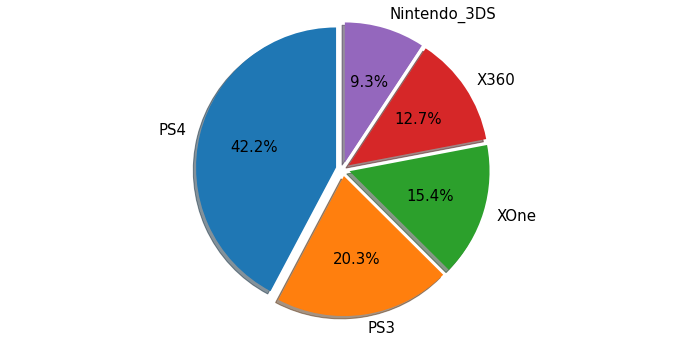

In [130]:
labels = list(df_eu_sales['platform'])
sizes = list(df_eu_sales['eu_sales'])

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

В европе ситуация выглядит по другому, лидеры продаж PS4 и PS3, ситуация интересная, т.к. платформа предыдущего поколения обходит по продажам новичка в лице XOne. Двойной превес над вторым местом - это определенно успех. Второе место PS3 можно лишь объяснить тем что для майкрософт, этоот рынок не является приоритетным. Консоль нового поколения от майкрософт - XOne, обходит предыдущуб модель всего на 2,7%, это говорит лишь о плохом старте первой. В конце нашего топ-5 находится Nintendo_3DS, которая и в европе уступает лидирующие позиции лидерам рынка.

### Определим самые популярные жанры в европе.

In [131]:
users = 'eu_sales'
idx = 'genre'

df_eu_genre = data[(data['year_of_release'] >= 2013) & 
                   (data[users] > 0)].pivot_table(index=idx, 
                   values=users, aggfunc='sum').sort_values(by=users, 
                     ascending=False).reset_index().head()
print('Топ-5 популярнах жанров в европе:', list(df_eu_genre[idx]))

Топ-5 популярнах жанров в европе: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']


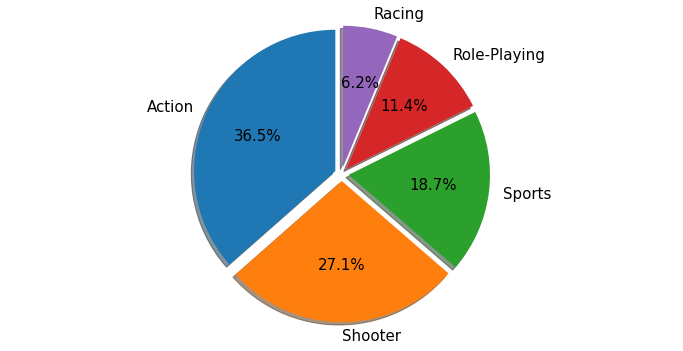

In [132]:
labels = list(df_eu_genre['genre'])
sizes = list(df_eu_genre['eu_sales'])

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

Топ-5 популярных жанров игр в увропе - 'Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'. Первые два уверенно держат лидерство. Это самые эмоциональные жанры, игры этих жанров захватывают и держат аудиторию любых возрастов. Освоить управление и гровой процесс достаточно легко. Игры спортивного жанра, достаточно узконаправленные игры, тут своя аудитория, отсюда и разрыв от второго места, но надо заметить что разрыв меньше чем в америке. И я уверен, что большая часть игроков этой аудитории, это игроки серии футбольных симуляторов. Жанр РПГ, имеет 7,3% отстование от спортивного, этот тот случай когда нужно сильно погружаться в игровой процесс, осваивать местами сложгое управление и понимать тонкости баланса игрового процесса, отсюда и такой результат. Пятый притендент так же на 5,2% отстает от предыдущего, это говорит о том что этот жанр еще менее популярен в европе.

### Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [133]:
users = 'eu_sales'
idx = 'rating'

df_eu_rating = data[(data['year_of_release'] >= 2013) & 
                   (data[users] > 0)].pivot_table(index=idx, 
                   values=users, aggfunc='sum').sort_values(by=users, 
                     ascending=False).reset_index().head()
print('Топ-5 популярнах рейтингов в европе:', list(df_eu_rating[idx]))

Топ-5 популярнах рейтингов в европе: ['M', 'E', 'unknown', 'E10+', 'T']


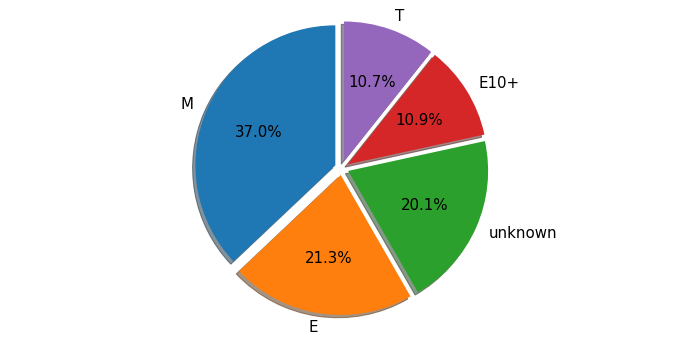

In [134]:
labels = list(df_eu_rating['rating'])
sizes = list(df_eu_rating['eu_sales'])

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

Описание абривиатур:
- «E» («Everyone») — «Для всех»;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «T» («Teen») — «Подросткам»;
- «M» («Mature») — «Для взрослых»;
- «unknown» - не определен на момент составления списка.

Логично что большинство игр находятся в рейтинге "М", это самая большая аудитория, да и к тому же наверняка эти рейтинги не соблюдаются. Вторая - игры для всех. Третья категория по объему продаж в этом топ-5, категория игр для которых не определен рейтинг. Возможно это вышло по тому что рейтинг еще не был присвоен, либо это пропуски в данных. Четвертая категория - игры для всех от 10 лет и старше. На мой взгляд, логично, что игры для всех выше в рейтинге чем категория которая имеет некоторые ограничения. Пятая категория - игры для подростков, имеет минимаотное отставание от четвертой строчки. Так как тут еще больше ограничений по возрасту, отсюда мне кажется ее и проигрыш.


## Регион Япония.

### Определим самые популярные платформы в Японии.

In [135]:
users = 'jp_sales'
idx = 'platform'

df_jp_sales = data[(data['year_of_release'] >= 2013) & 
                   (data[users] > 0)].pivot_table(index=idx, 
                   values=users, aggfunc='sum').sort_values(by=users, 
                     ascending=False).reset_index().head()
print('Топ-5 популярнах платформ в Японии:', list(df_jp_sales[idx]))

Топ-5 популярнах платформ в Японии: ['Nintendo_3DS', 'PS3', 'PSVita', 'PS4', 'WiiU']


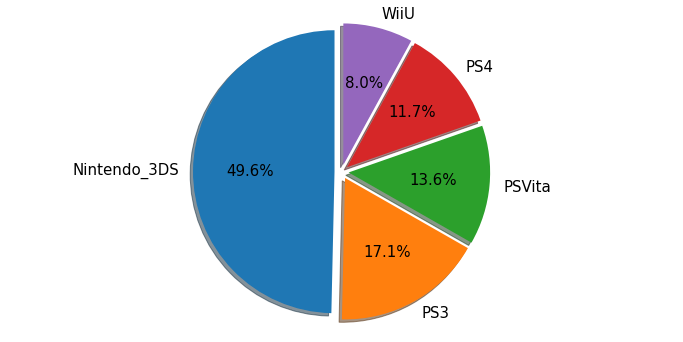

In [136]:
labels = list(df_jp_sales['platform'])
sizes = list(df_jp_sales['jp_sales'])

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

Маркетологи из майкрософт это видели??? =)

Это победа! Половина рынка за Nintendo_3DS - портативной платформой, это удивительно. В Европе и северной америке нинтендо и близко не имела такой процент превосходства. Скорее всего это объясняется что маркетинг узко направлен на своего потребителя. Так же возможно что имеет место быть наличие игр которые имеют большую популярность на этом рынке. второе место за PS3 это тоже странно, консоль прошлого поколения держит удар, и превосходит по продажам новую PS4 на 5,4%. Третье место тоже за портативной платформой PSVita, можно подумать что японцам некогда играть и они играют всегда, когда есть свободная минутка между делом. Четвертое место PS4 это тоже интересно, проигрыш не такой большой от третьего. Пятое место за WiiU с 8%, эта платформа звезд с неба не хватает, но ей удалось обойти все консоли от майкрософт, это своего рода победа.

### Определим самые популярные жанры в Японии.

In [137]:
users = 'jp_sales'
idx = 'genre'

df_jp_genre = data[(data['year_of_release'] >= 2013) & 
                   (data[users] > 0)].pivot_table(index=idx, 
                   values=users, aggfunc='sum').sort_values(by=users, 
                     ascending=False).reset_index().head()
print('Топ-5 популярнах жанров в Японии:', list(df_jp_genre[idx]))

Топ-5 популярнах жанров в Японии: ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']


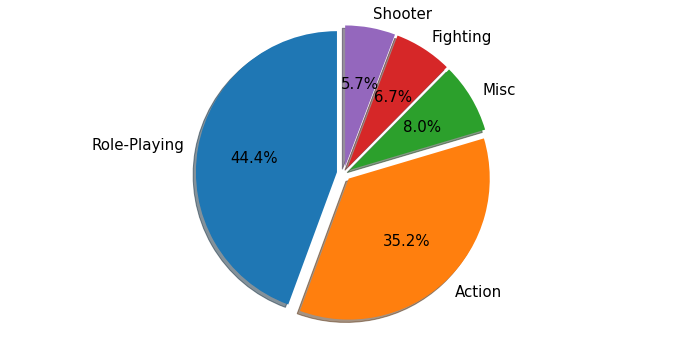

In [138]:
labels = list(df_jp_genre['genre'])
sizes = list(df_jp_genre['jp_sales'])

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

И снова Япония нас удивляет. РПГ на первом месте и с весомым отрывом. На втором месте Action игры, этот жанр в лидер на все трех рынках из этого исследования. третье место с большим разрывом проигрывает второму. Игры нижней тройки сильно отстают и имеют небольшой отрыв между собой. Файтинги всего процент выигрывают у шутеров - аутсайдеров топ-5.

### Определим влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [139]:
users = 'jp_sales'
idx = 'rating'

df_jp_rating = data[(data['year_of_release'] >= 2013) & 
                   (data[users] > 0)].pivot_table(index=idx, 
                   values=users, aggfunc='sum').sort_values(by=users, 
                     ascending=False).reset_index().head()
print('Топ-5 популярнах рейтингов в Японии:', list(df_jp_rating[idx]))

Топ-5 популярнах рейтингов в Японии: ['unknown', 'T', 'E', 'M', 'E10+']


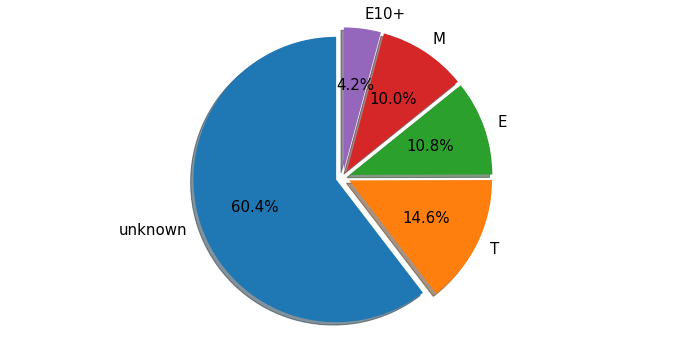

In [140]:
labels = list(df_jp_rating['rating'])
sizes = list(df_jp_rating['jp_sales'])

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

<div class="alert alert-success">
<h1> Комментарий ревьюера 👍 V2</h1>

С портретами вс тоже прекрасно)
</div>

# Шаг 5. Проверка гипотез.

## 5.1. Гипотеза H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Видвинем двух стороннюю нулевую гипотезу Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Не нулевая двух сторонняя гипотеза Н1- средние пользовательские рейтинги платформ Xbox One и PC различаются. Почему гтпотезы - двух сторонние. Потому,что нам важно выяснить - ровны ли рейтинги или нет. 

Для решения нам понадобятся две выборки с данными с рейтингами.

In [141]:
data.head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54


In [142]:
year = 2013
platform_list = ['XOne', 'PC']

#Сортировка по годам
#df_h0 = data[(data['platform'].isin(platform_list)) & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'user_score']].pivot_table(index=('year_of_release', 'platform'), values='user_score', aggfunc='mean').sort_values(by='year_of_release').reset_index()
#Без сортировки по годам
df_h0 = data[(data['platform'].isin(platform_list)) & (data['year_of_release'] >= year)][['platform', 'user_score']].pivot_table(index='platform', values='user_score', aggfunc='mean').sort_values(by='platform').reset_index()

df_h0

,platform,user_score
0,PC,6.269678
1,XOne,6.521429


Посчитав среднее значение оценок пользователей за 2013-2016 гг. для платформ "PC" и "XOne", можно ответить на вопрос исследования. Средние оценки не равны.

## Теперь определим среднее число оценок пользователей специальными методами пандас.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). 

- array1, array2 — массивы, содержащие выборки;

- equal_var (от англ. equal variance — «равная дисперсия») — необязательный параметр, задающий, считать ли равными дисперсии выборок. Передаётся как equal_var = True или equal_var = False (True — считать, False — не считать).

Рассмотрим три аспекта, которые надо проверить, чтобы понять, можно ли применять t-тест:

1. Генеральные совокупности не должны зависеть друг от друга.
    Если вы рассматриваете одну генеральную совокупность до и после какого-то изменения, нужно использовать другой тест.
2. Выборочные средние должны быть нормально распределены.
    А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.
3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

In [143]:
#Соберем данные по 'XOne'.
df_h0_xone = data[(data['platform'] == 'XOne') & (data['user_score'].isna() == False)].reset_index()['user_score']
df_h0_xone

0      7.9
1      5.4
2      6.4
3      6.2
4      4.1
      ... 
177    6.8
178    6.0
179    8.2
180    6.6
181    6.7
Name: user_score, Length: 182, dtype: float32

Количество оценок в списках не равно. Возьмем случайным образом из списка оценок по "PC" 182 шт. оценки. Таким образом добъемся равенства выборок.

In [144]:
##Соберем данные по 'PC'.
df_h0_PC = data[(data['platform'] == 'PC') & (data['user_score'].isna() == False)]['user_score']
df_h0_PC

import random
n = 182
test_list = list(df_h0_PC)
random_list = random.sample(test_list, n)
random_list = [round(i,1) for i in random_list]
print('Кол-во элементов в списке "PC":', len(random_list), 'шт.')
#random_list_pc[:5]
#Соберем элементы списка random_list_pc в датафрейм
random_df_h0_pc = pd.DataFrame(data=random_list, columns=['user_score'])
random_df_h0_pc

Кол-во элементов в списке "PC": 182 шт.


,user_score
0,6.7
1,8.5
2,4.3
3,6.7
4,4.2
...,...
177,7.5
178,4.9
179,6.5
180,5.5


In [145]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу

array_1 = df_h0_xone
array_2 = random_df_h0_pc

results = st.ttest_ind(array_1, array_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: [0.00011784]
Отвергаем нулевую гипотезу


Расчет по статистическим методам питона, так же отвергает нулевую гипотезу. А значит, что средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

## 5.2. Гипотеза H0 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Видвинем двух стороннюю нулевую гипотезу Н0 - средние пользовательские рейтинги жанров Action и Sports разные. Не нулевая двух сторонняя гипотеза Н1- средние пользовательские рейтинги жанров Action и Sports равны. Почему гтпотезы - двух сторонние. Потому,что нам важно выяснить - ровны ли рейтинги или нет. 

Для решения нам понадобятся две выборки с данными с рейтингами.

In [146]:
data.head(1)

,unnamed,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54


In [147]:
year = 2013
genre = ['Action', 'Sports']

#Сортировка по годам
#df_h0 = data[(data['platform'].isin(platform_list)) & (data['year_of_release'] >= year)][['platform', 'year_of_release', 'user_score']].pivot_table(index=('year_of_release', 'platform'), values='user_score', aggfunc='mean').sort_values(by='year_of_release').reset_index()
#Без сортировки по годам
df_h0 = data[(data['genre'].isin(genre)) & (data['year_of_release'] >= year)][['genre', 'user_score']].pivot_table(index='genre', values='user_score', aggfunc='mean').sort_values(by='genre').reset_index()

df_h0

,genre,user_score
0,Action,6.837532
1,Sports,5.238125


Посчитав среднее значение оценок пользователей за 2013-2016 гг. для двух жаноров "Action" и "Sports", можно ответить на вопрос исследования. Средние оценки разные.

## Теперь определим среднее число оценок пользователей специальными методами пандас.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). 

- array1, array2 — массивы, содержащие выборки;

- equal_var (от англ. equal variance — «равная дисперсия») — необязательный параметр, задающий, считать ли равными дисперсии выборок. Передаётся как equal_var = True или equal_var = False (True — считать, False — не считать).

Рассмотрим три аспекта, которые надо проверить, чтобы понять, можно ли применять t-тест:

1. Генеральные совокупности не должны зависеть друг от друга.
    Если вы рассматриваете одну генеральную совокупность до и после какого-то изменения, нужно использовать другой тест.
2. Выборочные средние должны быть нормально распределены.
    А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.
3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

In [148]:
#Соберем данные по 'Sports'.
df_h0_sports = data[(data['genre'] == 'Sports') & (data['user_score'].isna() == False)].reset_index()['user_score']
df_h0_sports

0       8.0
1       8.0
2       7.7
3       7.4
4       4.3
       ... 
1098    4.5
1099    1.4
1100    6.9
1101    9.5
1102    6.6
Name: user_score, Length: 1103, dtype: float32

Количество оценок в списках не равно. Возьмем случайным образом из списка оценок по "Action" 1103 шт. оценки. Таким образом добъемся равенства выборок.

In [149]:
#Соберем данные по 'Action'.
df_h0_action = data[(data['genre'] == 'Action') & (data['user_score'].isna() == False)].reset_index()['user_score']
df_h0_action

import random
n = 1103
test_list = list(df_h0_action)
random_list = random.sample(test_list, n)
random_list = [round(i,1) for i in random_list]
print('Кол-во элементов в списке "Action":', len(random_list), 'шт.')
#random_list_pc[:5]
#Соберем элементы списка random_list в датафрейм
random_df_h0_act = pd.DataFrame(data=random_list, columns=['user_score'])
random_df_h0_act

Кол-во элементов в списке "Action": 1103 шт.


,user_score
0,5.7
1,6.5
2,6.8
3,8.5
4,8.4
...,...
1098,8.7
1099,6.9
1100,7.0
1101,7.0


In [150]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу

array_1 = df_h0_sports
array_2 = random_df_h0_act

results = st.ttest_ind(array_1, array_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: [0.15430617]
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, а значит средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-success">
<h1> Комментарий ревьюера 👍 V2</h1>

С гиоптзами ты тоже отлично разобрался)
</div>

<div class="alert alert-info">

## Общий вывод:
В ходе данной работы были проделаны следующие шаги:
- проделана работа по предобработке данных;
- посчитаны суммарные продажи по всем регионам;
- произведен исследовательский анализ данных, по результатам которого было определено какое количество игр выпускалось в разные годы. По графикку можно сказать, что рост выпускаемых игр начался в 1993 году, пик пришелся на 2008 и 2009 года, а далее наблюдаем большой спад;
- определено изменение продаж по платрформам;
- определены платформы с наибольшими суммарными продажами это - 'PS2', 'X360', 'PS3', 'Wii', 'Nintendo_DS', 'PS';
- определены самые прибыльные жанры: 'Shooter', 'Sports', 'Platform', 'Role-Playing', 'Racing', 'Fighting', 'Action';
- определен актуальный период жизни платформы, который составил 10 лет;
- определены лидирующие платформы по продажам за актуальный период;
- проработаны зависимости между отзывами игроков и критиков на продажи и выявлены закономерности;
- проработаны зависимости между определенными жанрами и продажами и выявлены закономерности;
- определены самые популярные жанры и платформы для пользователей трех регионов;
- выдвинуты две двухсторонние гипотезы и приведены расчеты для подтверждения или опровержения этих гипотез.

Обе выдвинутые гипотезы были двух сторонними, что означает, что мы рассматриваем только верно ли предположение или нет, а в какую сторону если нет нам не важно в контексте данной задачи.  Уровень значимости был выбран равным 5%. Уровень значимости численно определяет, где проходит граница вероятности попасть слишком далеко от центра распределения. 

Считаю игры на платформах "PS4" и "XOne" приоритетными целями для рекламных компаний. Конкретизировать платформу в условиях поставленной задачи трудно, потому, что: продажи игр зависят от того, какая именно игра выходит на той или иной платформе. Большинство игр являются кроссплатформенными т.е. выходят на всех платформах почти одновременно, но есть и исключения, которые выходят эксклюзивно только на одной платформе. Значит необходимо для полной картины рассмотреть список выходящих игр на 2017 год. Это помогло бы более точно определиться с напрвление для рекламной компании. Так же, надо учитывать настрой и самих пользователей той или иной платформы. Например "XOne" на момент запуска проиграла по всем статьям своему прямому конкуренту "PS4". Отсюда и такие низкие стартовые продажи в сравнении с "PS4".

<div>

<div class="alert alert-warning">
<h1> Общий комментарий о работе V2</h1>
    
Отличная работа! Ты молодец) Видно, что неплохо разобрался с темами спринтов. Есть немного замечаний, но уверен, что они не вызовут у тебя сложностей. После доработки обязательно проверь комментарии и выводы. Возможно их нужно будет скорректировать.
    
Жду доработанную версию проекта)
</div>

<div class="alert alert-success">
<h1> Общий комментарий о работе V3</h1>
    
Критических замечаний больше нет, значит проект можно принимать) Спасибо большое за проделанную работу, у тебя получился отличный проект!

Желаю успехов в дальнейшем обучении)
</div>